# Rebuttal analysis figures for Nat. Comm.

Reviewer 3 has pointed out that in Fig 2a, the "within" trials variance is similar to the variance "across" stimuli. Addressing that point directly here with the analysis below. However, that is a part of the more important question of whether there is precise balance based excitatory and inhibitory weight tuning. Further below in this notebook is an analytical framework and preliminary analysis, using which we can try to address that problem. More to come on that later.

In [1]:
import sys
sys.path.append("../")
import glob
from mpl_toolkits.axes_grid1 import make_axes_locatable
import math
from matplotlib import mlab
from Linearity import Neuron
import numpy as np
import scipy.stats as ss
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.font_manager import findfont, FontProperties
matplotlib.rcParams['text.usetex'] = False
matplotlib.rc('text.latex', preamble=r'\usepackage{cmbright}')
matplotlib.rc('font',**{'family':'sans-serif','sans-serif':['Arial']})
plt.style.use('neuron')
from pickle import dump
import random

In [2]:
def simpleaxis(axes, every=False, outward=False):
    if not isinstance(axes, (list, np.ndarray)):
        axes = [axes]
    for ax in axes:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        if (outward):
            ax.spines['bottom'].set_position(('outward', 10))
            ax.spines['left'].set_position(('outward', 10))
        if every:
            ax.spines['bottom'].set_visible(False)
            ax.spines['left'].set_visible(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.set_title('')

In [3]:
#Colorscheme for squares
color_sqr = { index+1: color for index, color in enumerate(matplotlib.cm.viridis(np.linspace(0,1,9)))}

In [4]:
voltageClampFiles = '/media/sahil/NCBS_Shares_BGStim/patch_data/voltage_clamp_files.txt'

In [5]:
with open (voltageClampFiles,'r') as r:
    dirnames = r.read().splitlines()

In [6]:
#Colorscheme for cells
color_cell = matplotlib.cm.jet(np.linspace(0,1,len(dirnames)))

In [7]:
dirnames = ['/home/bhalla/Documents/Codes/data' + j for j in ['/media/sahil/NCBS_Shares_BGStim/patch_data/161220/c2_EI/',
 '/media/sahil/NCBS_Shares_BGStim/patch_data/170510/c2_EI/',
 '/media/sahil/NCBS_Shares_BGStim/patch_data/170524/c3_EI/',
 '/media/sahil/NCBS_Shares_BGStim/patch_data/170524/c1_EI/',
 '/media/sahil/NCBS_Shares_BGStim/patch_data/170530/c2_EI/',
 '/media/sahil/NCBS_Shares_BGStim/patch_data/170530/c1_EI/',
 '/media/sahil/NCBS_Shares_BGStim/patch_data/170531/c2_EI/',
 '/media/sahil/NCBS_Shares_BGStim/patch_data/170531/c4_EI/',
 '/media/sahil/NCBS_Shares_BGStim/patch_data/170531/c1_EI/',
 '/media/sahil/NCBS_Shares_BGStim/patch_data/170720/c5_EI/',
 '/media/sahil/NCBS_Shares_BGStim/patch_data/170720/c3_EI/',
 '/media/sahil/NCBS_Shares_BGStim/patch_data/170720/c4_EI/',
 '/media/sahil/NCBS_Shares_BGStim/patch_data/170720/c2_EI/']]

In [8]:
neurons = []
for dirname in dirnames:
    cellIndex = dirname.split('/')[-2]
    filename = dirname + 'plots/' + cellIndex + '.pkl'
    neurons.append(Neuron.load(filename))

In [9]:
scalingFactor = 1e9 #nA.ms
e_within_across_ratio = {}
i_within_across_ratio = {}
cell_e_within_across_ratio = {}
cell_i_within_across_ratio = {}
sqrList = []

## Within standard deviation is usually smaller than across data and the variance is proportional to the mean (13 cells)

Three plots will repeat below for each cell. First one is a comparison of within to across variance when grouped by number of stimulus squares. Here colors depict different squares, where 1 square is dark violet and 9 square is yellow. Second one shows how the variance changes with mean of the response to all stimuli presented to a cell. Third plot is again comparing "within" to "across" variance, when grouped by stimulus amplitude. Here colors depict different bins of stimulus amplitude, where bins with larger amplitudes are yellower.

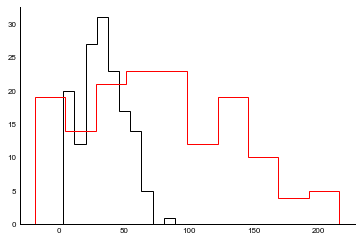

c2_EI 161220


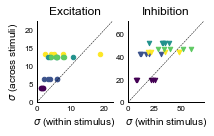

(0.3807868241925927, 19.653717904194107)
(4.975794093823032, 62.810293770116125)


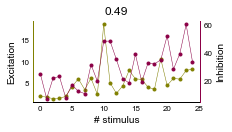

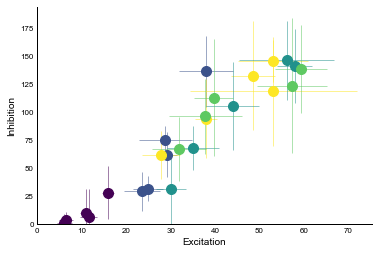

key is 1
key is 3
key is 9
key is 5
key is 7


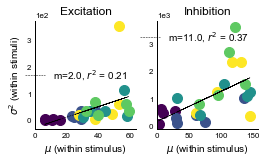

25 25
Correlation for sum of synaptic variance: 0.398138622442


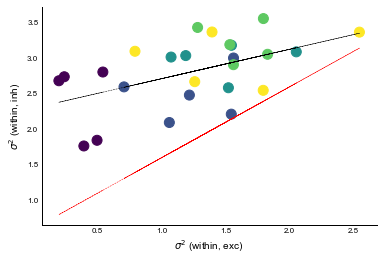

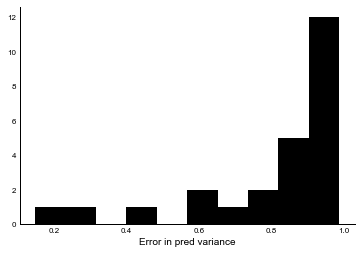

0.28053490642035644 0.19053025927502468


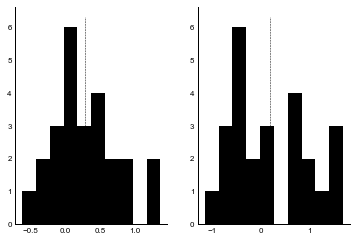

[ 0.64257217  1.21510684 -0.34849369 -0.01314732  0.0565662   0.50362322
  0.41294191 -0.62462476 -0.22526701  0.11648338  1.37168092 -0.25376498
  0.52727911  0.06234523  0.90817768  0.57662625 -0.13006264  0.85195329
  0.19273079 -0.1578838   0.06151769  0.30224922  0.17171335  0.24216626
  0.55088336] [ 0.62721873 -0.53502012  1.04905618 -0.53702012 -0.81356953 -0.45900079
 -0.61350466  1.68761274 -0.42082012 -0.3849971   0.25804031  0.71548344
 -0.27673268  0.57442174  0.25599934  1.01905286 -0.47406285 -0.74528466
 -0.12443812  0.74912663  1.53683871  1.43693013  1.15505703 -1.15780869
  0.24067807]


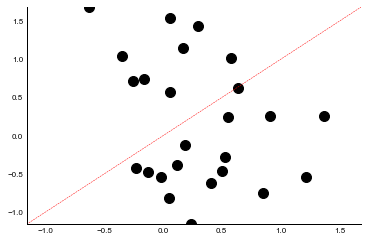

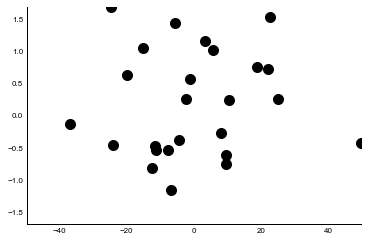

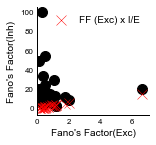

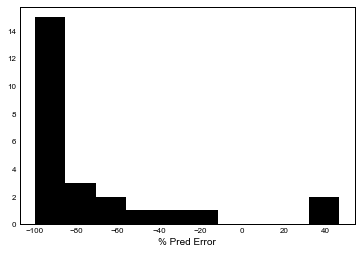

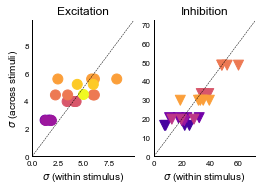

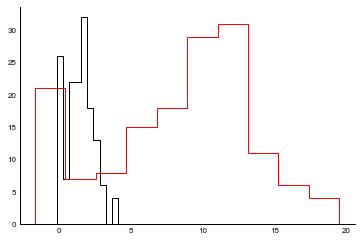

c2_EI 170510


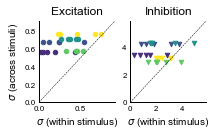

(-0.012363544703052513, 0.7890268914735339)
(0.03130448209513231, 5.138624740638239)


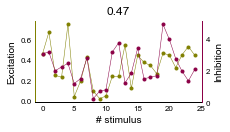

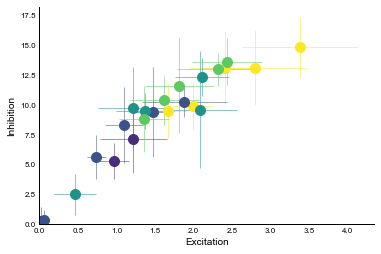

key is 9
key is 2
key is 3
key is 5
key is 7


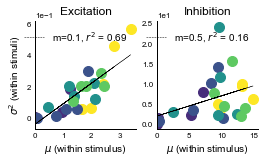

25 25
Correlation for sum of synaptic variance: 0.28200782324


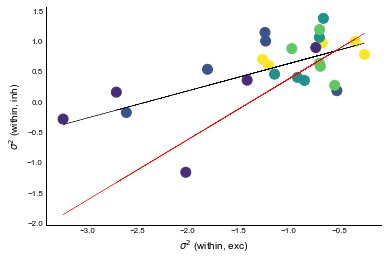

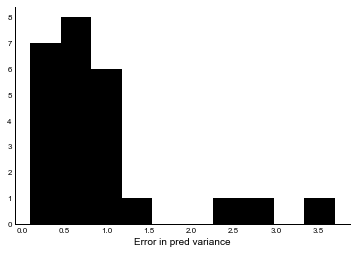

0.20624795240393087 0.2633162237994599


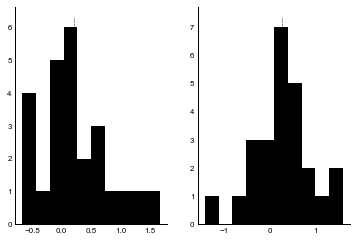

[ 0.70069396  0.94524222 -0.30563214 -0.624232   -0.07076307  0.52831899
 -0.14904615  0.05116509  0.20815447 -0.07657316  0.51327339  1.35118851
  0.1533754   0.38577504 -0.5290405  -0.18056885  0.12869899  1.68116039
  0.34879883  1.09904886  0.02128976 -0.45853599  0.03851148 -0.67026852
  0.06616384] [ 1.34838103  0.33946942 -0.23985205  0.42030584  0.19290248  0.52243886
  0.69724682  0.52658811  0.52618259 -1.41767102  0.72134283  0.23839217
  0.14628975  0.29186574 -0.05237897  0.65483019 -0.62277082  1.18161155
  0.02486693 -0.43397413  1.60056083 -0.43241831  0.20966155 -0.13213099
  0.27116518]


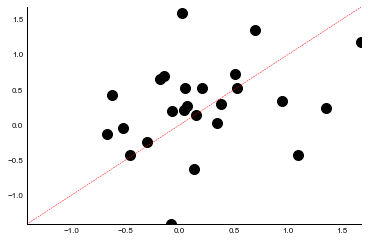

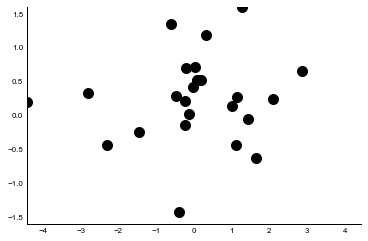

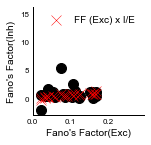

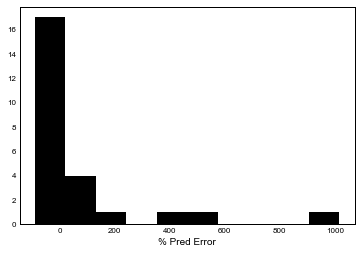

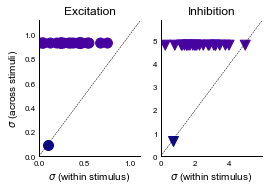

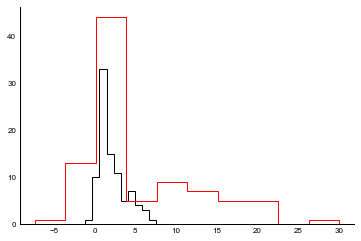

c3_EI 170524


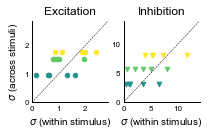

(0.025070169604449646, 2.50574966482051)
(-0.02869593556746919, 12.197994566170918)


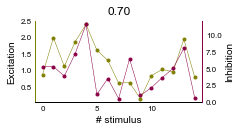

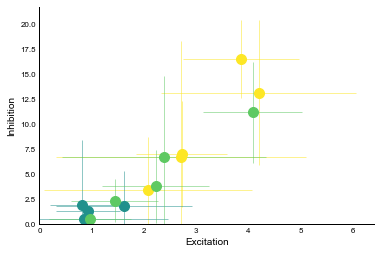

key is 9
key is 5
key is 7


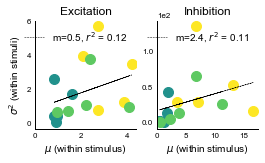

15 15
Correlation for sum of synaptic variance: 0.785405055633


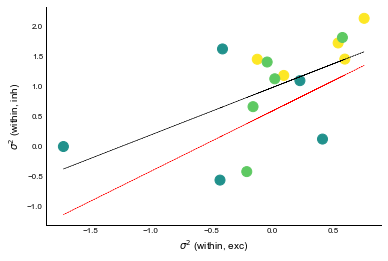

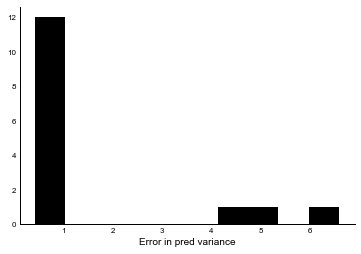

0.665539791506457 0.35805549708921675


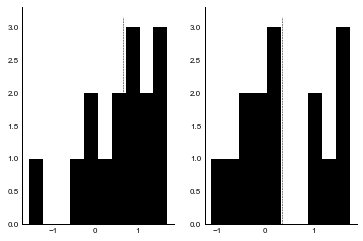

[ 0.60905615  1.70611919 -0.10349919 -0.38331373  1.65552947  0.961286
  1.25257559  1.33931575  1.04302464  0.51319199  0.37675244  0.05318288
 -1.56794514  1.02008007  1.50774075] [ 1.01722512  1.767883   -0.23680159 -0.69180177  1.63939534  0.15399517
  1.48554589 -0.47930478  0.04662337 -0.0904801   1.3055724   0.04057723
 -1.11444254  1.01982388 -0.49297815]


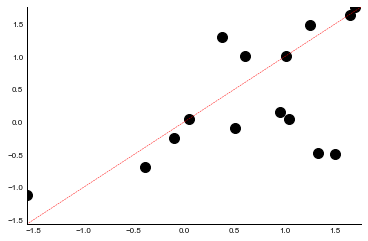

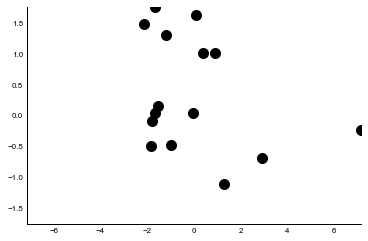

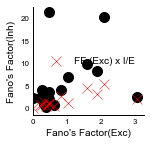

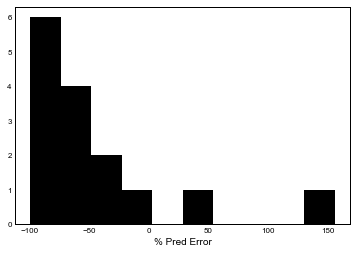

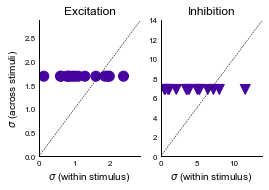

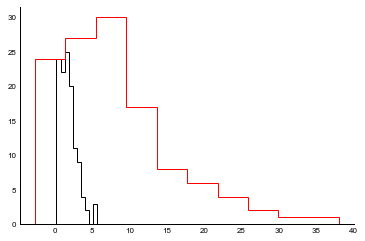

c1_EI 170524


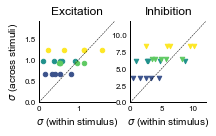

(0.03855854943039644, 1.684354534150764)
(0.015333266576270654, 10.661753525657005)


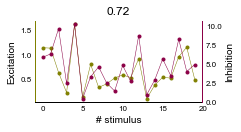

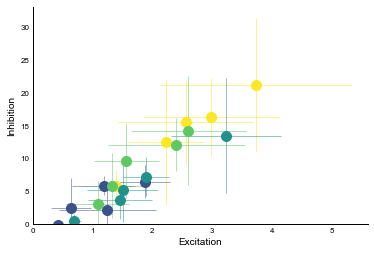

key is 9
key is 3
key is 5
key is 7


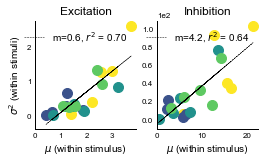

20 20
Correlation for sum of synaptic variance: 0.661485508528


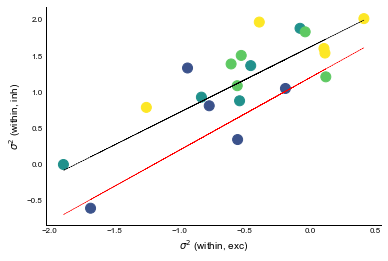

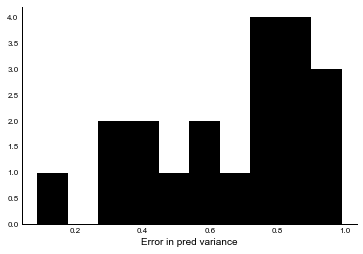

0.21825950785505466 0.17714345789597333


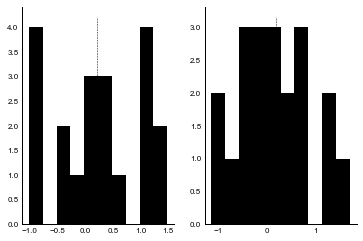

[ 1.48322465 -0.85434744  1.28942032 -0.19358422  0.35178758  1.0775834
  0.34964014  1.11160094  0.67457035 -0.90114632  0.21475002 -1.01157896
 -0.37234708 -0.45200163 -0.01356908  1.02155509  1.07150816 -0.00224622
  0.29653137 -0.77616092] [-0.39509852  0.10722178  1.39588668  0.73894965  0.77454836 -0.62630102
  0.04268797  1.69463069 -1.01351153  0.74444709  0.2748736  -0.04323926
  1.22669885 -1.13113236  0.4085055  -0.22283896 -0.44269633 -0.29369251
  0.31727439 -0.01434491]


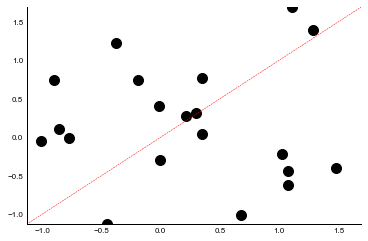

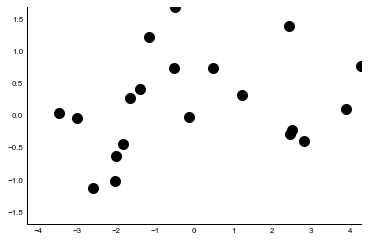

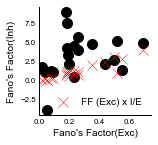

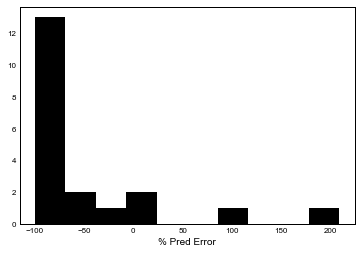

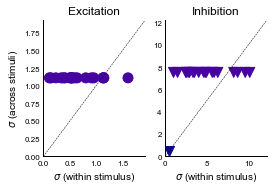

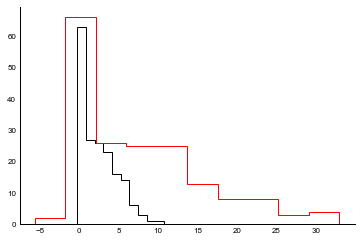

c2_EI 170530


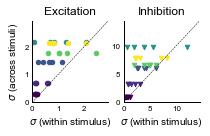

(-0.06292675157945908, 2.5682079040172385)
(-0.30383810196449607, 12.592510518184913)


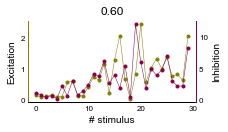

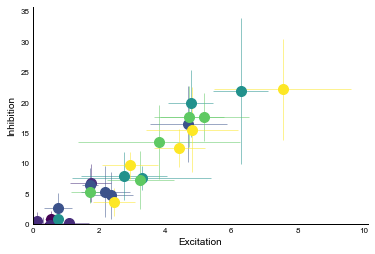

key is 1
key is 2
key is 3
key is 5
key is 7
key is 9


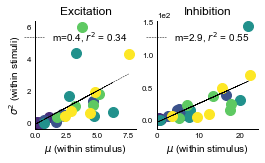

30 30
Correlation for sum of synaptic variance: 0.335575409605


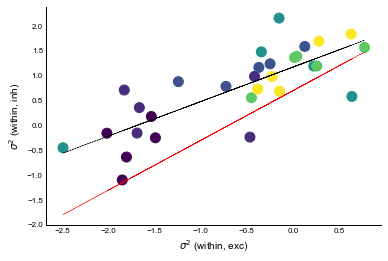

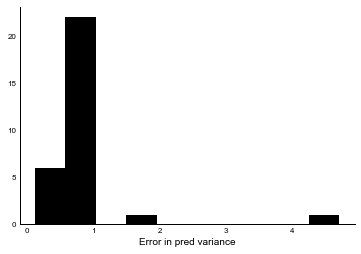

0.1347829231434358 0.17395783289718988


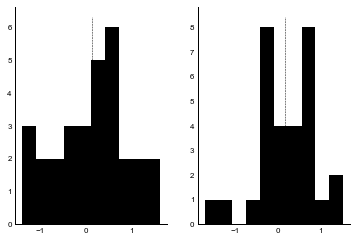

[-0.31679916 -0.23142047  0.83425429 -1.0531033  -1.39465858  0.51401156
  0.38998691 -0.15702373 -0.11815877  0.28215664  1.64495518 -0.49333682
  0.01718089  1.39866401  0.71359613  1.17448676  0.51776801 -1.09184833
  0.70635241  0.79095313  1.21339767 -1.2062577  -0.95680465  0.33816513
  0.5103661   0.29467794 -0.39822833 -0.69126679  0.55213372  0.25928784] [-0.3174963  -0.42544434  0.70445296 -1.29097389  0.18590269 -1.71866507
  0.25690118  0.43657462  0.81563035  1.53050177  0.67021677 -0.03303716
  0.63556025 -0.3535007   0.8282153   1.08309953 -0.37406919 -0.00549234
  0.31525827 -0.20120645  1.28694017 -0.25297063 -0.15685064  0.5671767
  0.61665478  0.5574926   0.24820018 -0.34027254  0.10739961 -0.15746347]


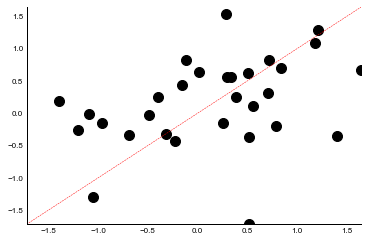

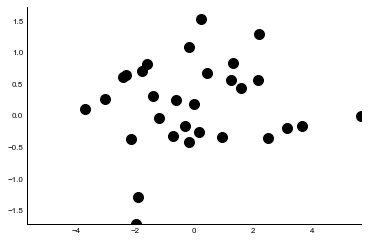

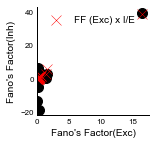

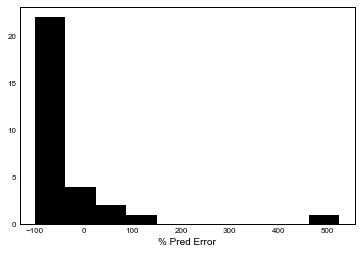

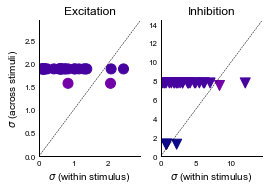

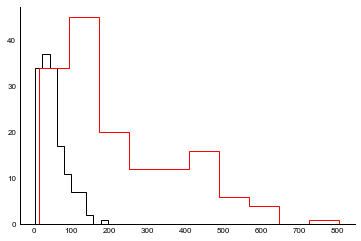

c1_EI 170530


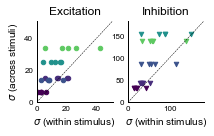

(-0.9480394009576307, 44.67495483060175)
(7.721951813424033, 159.00305790014175)


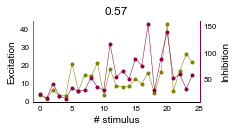

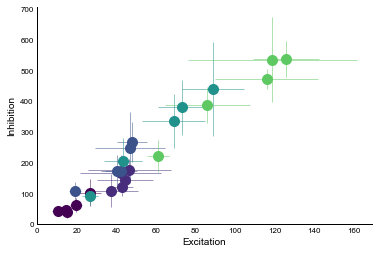

key is 1
key is 2
key is 3
key is 5
key is 7


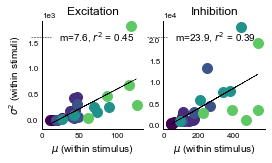

25 25
Correlation for sum of synaptic variance: 0.533423734428


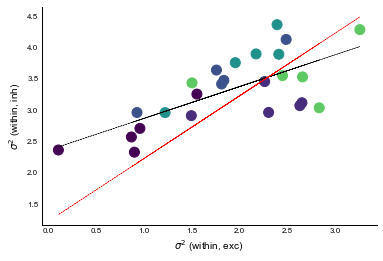

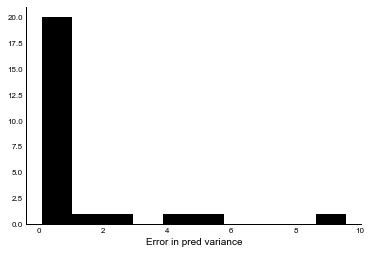

0.038022372523717124 0.08489787393629314


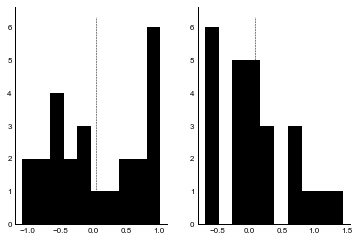

[-0.44043067 -0.5718381  -0.24050992 -0.83390816  0.99794185 -1.08633134
 -0.76213664 -0.18127327  0.95951254  0.40118498 -0.55069969 -0.13560897
 -0.88070498  0.86994497  0.0011987   0.45554333  0.75811931 -0.56571063
 -0.45054702 -0.59465894  1.0214658   0.89735773  0.60894469  0.36849999
  0.90520375] [-0.56592626  0.60852743 -0.14709138  0.21341973 -0.62536223 -0.5838287
  0.21410865 -0.14036483  0.03044561  0.6634962   0.84023164 -0.14077704
  0.18948635 -0.01261662  1.21927008 -0.52859208  0.70565765  0.09941113
 -0.69877702 -0.50963901  1.4493076   0.07401351  0.00611473 -0.08153387
 -0.15653443]


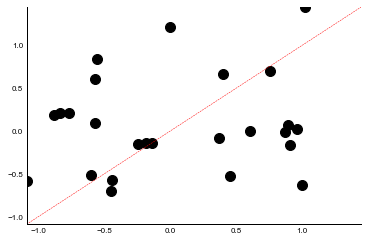

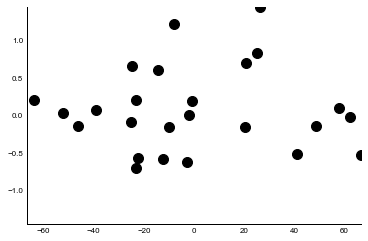

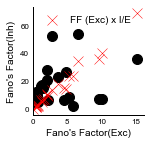

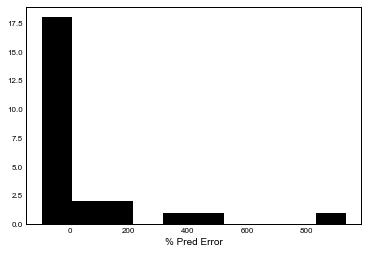

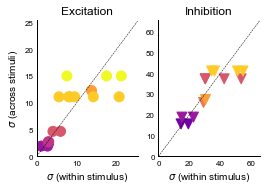

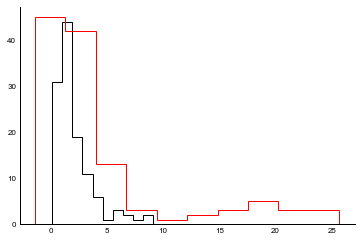

c2_EI 170531


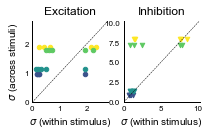

(0.045171645360142704, 2.4431853819799265)
(0.372089559584279, 8.937417454916648)


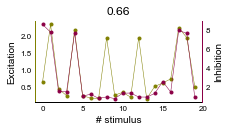

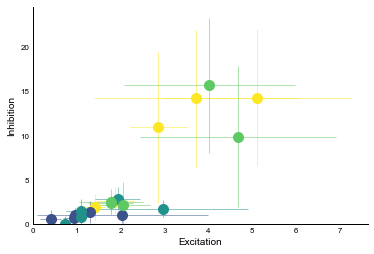

key is 9
key is 3
key is 5
key is 7


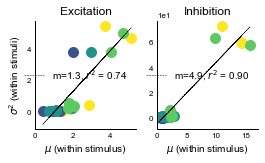

20 20
Correlation for sum of synaptic variance: 0.656106263771


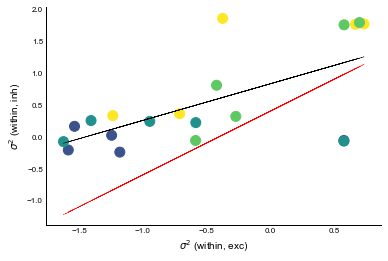

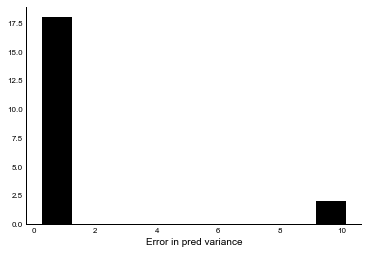

0.3964021601081806 0.008233644017303917


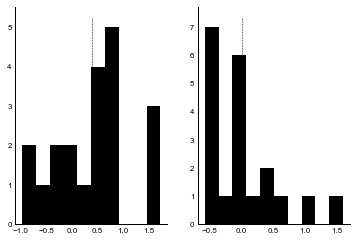

[ 0.65219818  0.69574545  0.42463982 -0.75427556  0.63991308  0.7356956
  0.05726814  0.67587238  1.72422921 -0.57095169  0.04968354  0.27742776
  0.68255174 -0.96628364 -0.29660235  0.4997507   0.46069398  1.5432227
  1.71026182 -0.31299766] [-0.02992158 -0.05832759 -0.53467264 -0.34292377 -0.48542559  0.55931602
  1.05421674  0.02319075  0.46890396 -0.13766905  0.35268205  0.00610594
 -0.57803451 -0.39845646  0.03179844  0.11380152 -0.44450718  1.5961512
 -0.58102765 -0.45052771]


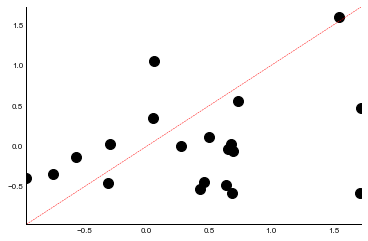

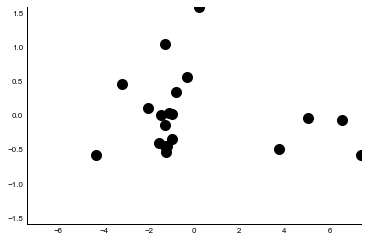

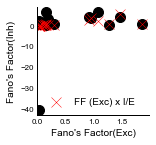

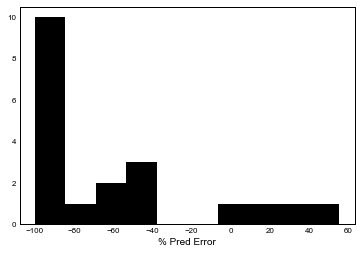

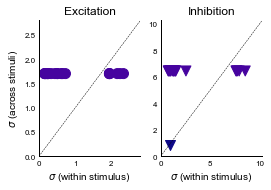

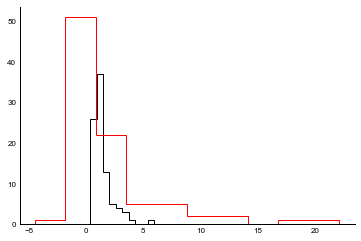

c4_EI 170531


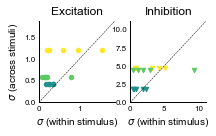

(0.013553846371860731, 1.6288716136668147)
(-0.11294166676306794, 9.759685214659788)


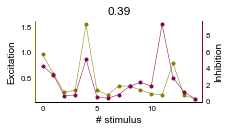

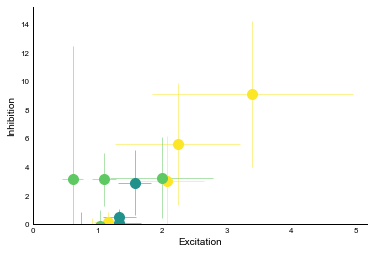

key is 9
key is 5
key is 7


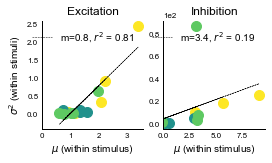

15 15
Correlation for sum of synaptic variance: 0.188376907977


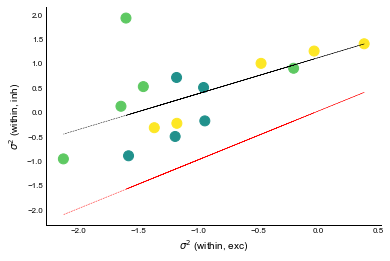

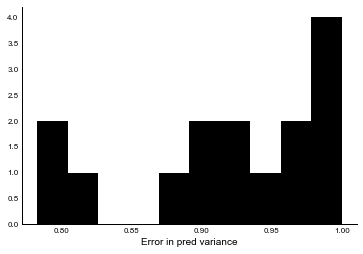

0.13542293633695887 0.17153859457040527


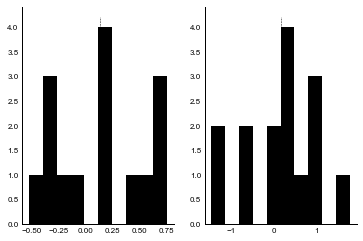

[ 0.21047433  0.71995631 -0.37139707  0.21668009  0.41912336 -0.38579161
  0.18762045 -0.31977908  0.53048803 -0.23970685 -0.5212692   0.76092559
  0.20088231 -0.01228465  0.63542203] [ 0.3352943   0.63689667 -0.64958631  0.06921452  0.37978969 -0.78267384
 -1.16785009  0.91605356 -1.46674232  0.18121321  1.11109933  1.78142775
  0.3949454   0.95662964 -0.1226326 ]


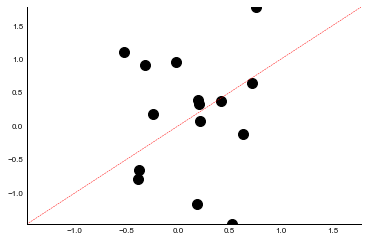

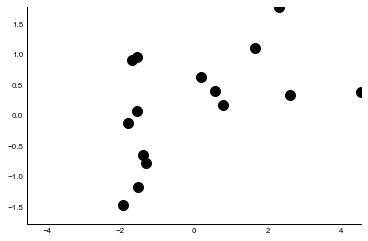

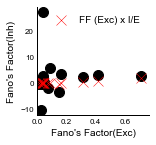

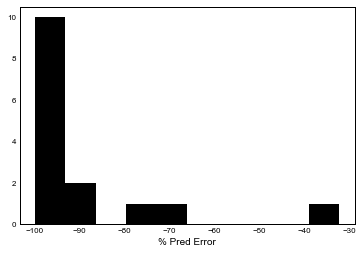

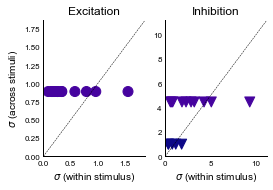

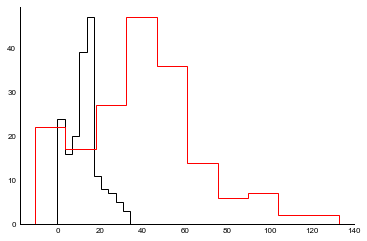

c1_EI 170531


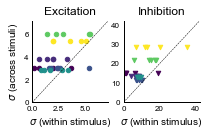

(-0.05809694746518679, 5.688716589751649)
(-0.7087609599374282, 36.77627100584313)


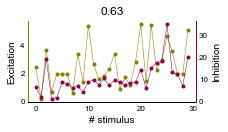

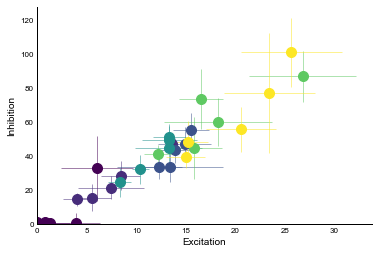

key is 1
key is 2
key is 3
key is 5
key is 7
key is 9


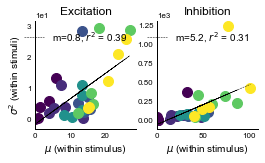

30 30
Correlation for sum of synaptic variance: 0.482949387915


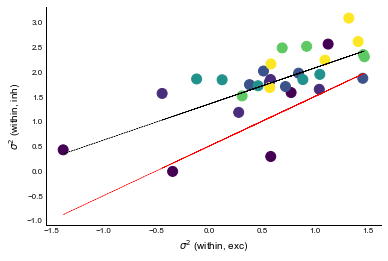

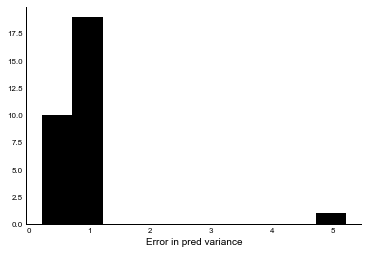

0.09747961463873088 0.037928118633658636


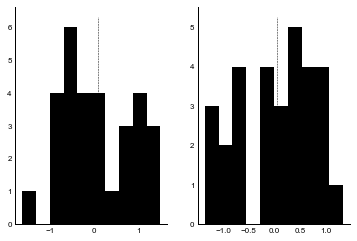

[-2.78315101e-04 -5.50476859e-01  5.14388693e-01  1.07433431e+00
  1.50425270e+00 -7.41801402e-01 -8.84757971e-01 -1.63214736e+00
 -3.44751768e-01  6.17310033e-01  1.47717514e+00  2.16737420e-01
 -9.70843896e-01 -4.53826702e-01  1.07361605e+00  1.44730732e+00
 -4.54549700e-01  2.28179515e-01  7.63340697e-01 -2.21729427e-01
  1.09560133e+00 -5.77998553e-01  9.67552570e-02  5.91079207e-01
  9.41349383e-01 -7.28950491e-01 -4.58948554e-01 -4.03380875e-01
 -1.05147383e-01 -1.87449361e-01] [-1.08376908 -0.62313131 -0.05448043  1.02376728  0.66230941 -0.07985136
 -0.66038819  0.80702832 -0.62648237  0.47594389  0.90705464  0.39218916
 -0.06560354  0.37013708 -1.33312329  1.02438373  1.3285391   0.66019969
 -0.04696301  0.57864134  0.26747212 -1.32721631 -0.74385162  0.72969894
 -1.35582518  0.48794607  0.05275171 -0.95738152  0.15614511  0.17170319]


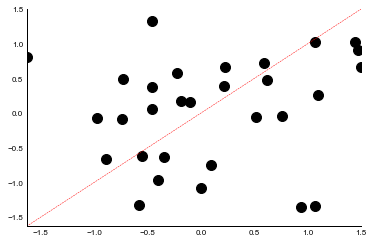

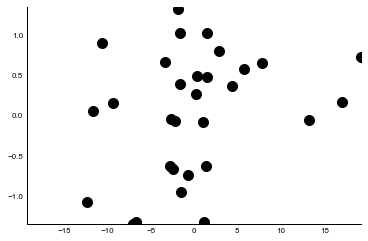

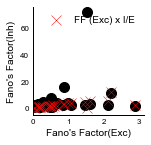

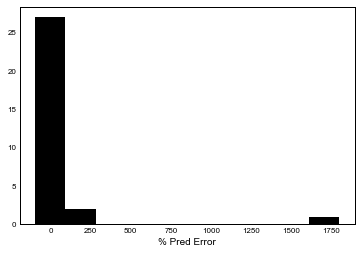

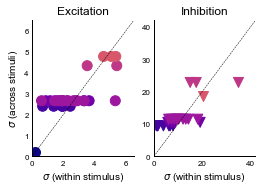

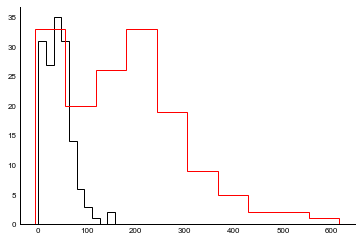

c5_EI 170720


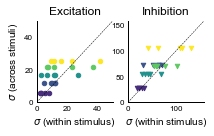

(0.05253766133989779, 43.956229135295295)
(12.29977843559694, 137.7343513345041)


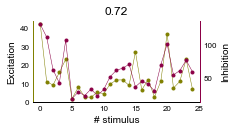

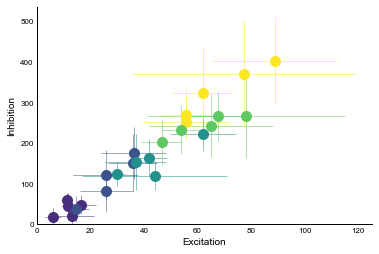

key is 9
key is 2
key is 3
key is 5
key is 7


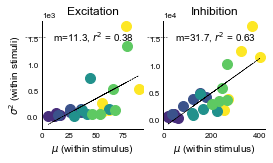

25 25
Correlation for sum of synaptic variance: 0.738389408313


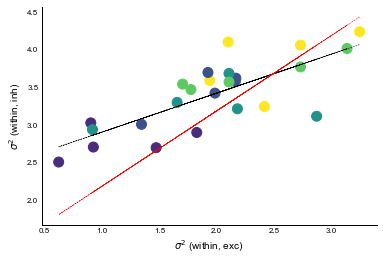

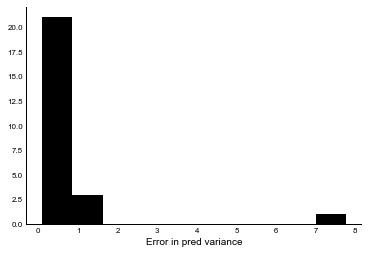

0.3594511346758598 0.33668746850558273


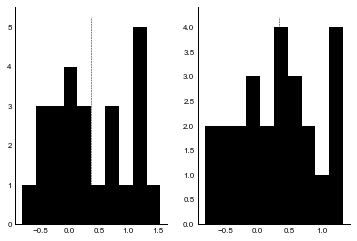

[ 1.30220815  0.77912093 -0.08370624  1.13633034  0.01746589 -0.43179515
  0.69417886 -0.81174895  1.0894936   0.01905419  0.34351944 -0.3764849
  0.64445798 -0.23742166 -0.30581034  1.14974537  1.31478958 -0.46896556
  0.4587106   0.06135423  1.55424981  0.20037034  0.18991436  0.8578898
 -0.1106423 ] [ 1.1433291   0.77623669 -0.01867875 -0.42297114 -0.27650873  0.23307052
  0.67803766  0.46751643  1.20786529  0.00203562  1.11560862  0.4130914
 -0.12718038 -0.67147605 -0.26575899 -0.58174813  0.13992306  1.33850055
 -0.829523    0.88348555  0.66182736  0.28785757  0.66164372  0.39131264
  1.20969013]


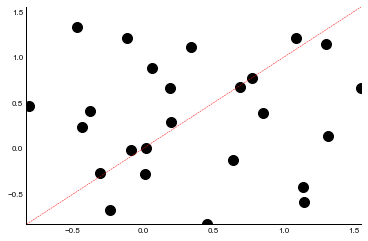

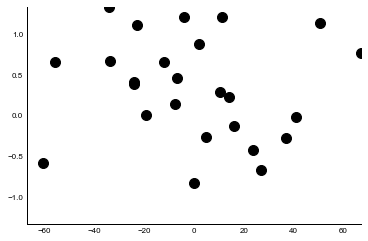

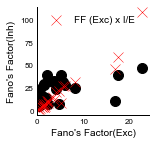

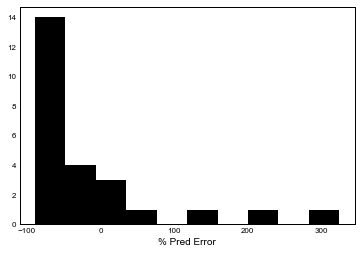

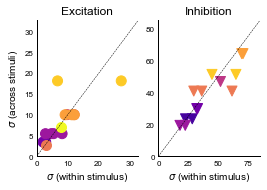

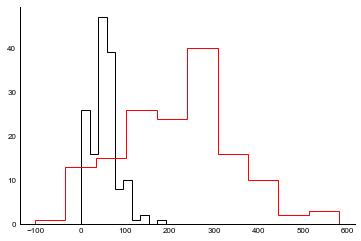

c3_EI 170720


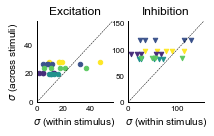

(-0.5496799561889965, 49.37495846657728)
(0.6506857272414095, 134.9883319207767)


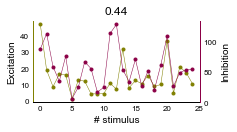

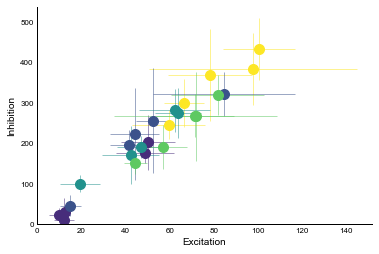

key is 9
key is 2
key is 3
key is 5
key is 7


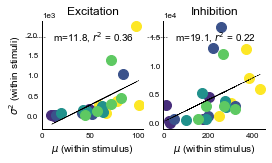

25 25
Correlation for sum of synaptic variance: 0.313395978966


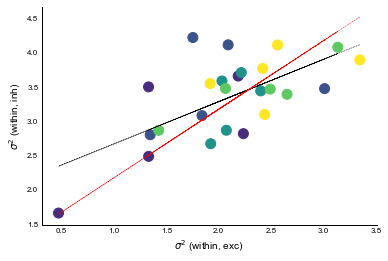

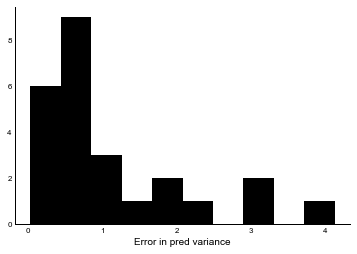

0.11387822458520017 0.22610540501955811


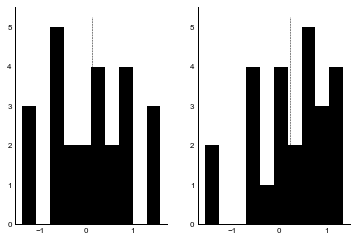

[ 1.60155258  0.18342526 -1.38533744 -0.09752992 -0.78310299  0.08834566
 -1.10274371 -0.63743345  0.33167111 -1.16270849  0.38540028 -0.29170972
 -0.506523    0.92203895 -0.7093633   0.84478736  0.49196549  0.72581273
 -0.20956101 -0.67521535  1.53372481  1.55568236  0.63373872  0.8679891
  0.24204961] [ 0.80962713  1.17760964  0.60309472 -0.59697109  1.1046841  -1.50532899
  0.45483985 -0.01733926 -1.59059692  0.20347665 -0.63500431 -0.03978314
  1.3661635  -0.05528372  0.82145128  0.55425444  0.5853532   1.1632483
  0.17541883 -0.62350753  0.72925928  0.91135654 -0.43632124  0.66731415
 -0.17438031]


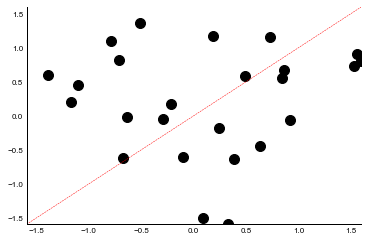

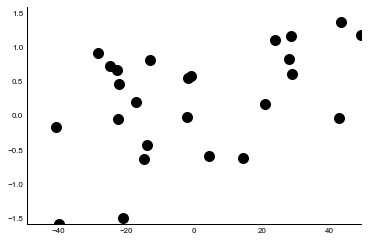

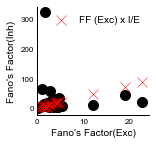

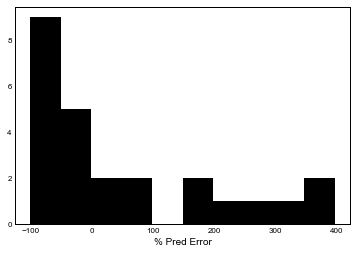

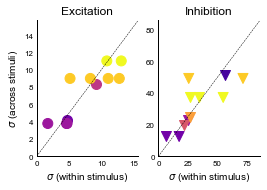

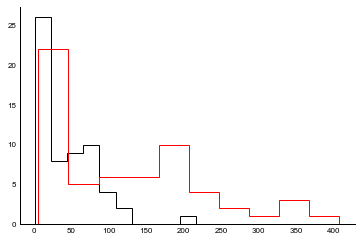

c4_EI 170720


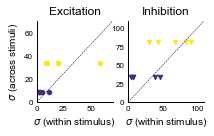

(-1.4379406906205423, 61.63542544194028)
(0.16838609111764669, 95.81007908140975)


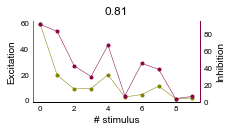

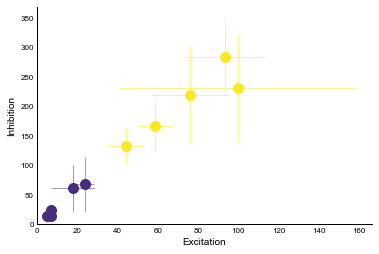

key is 9
key is 2


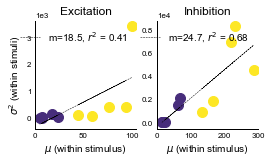

10 10
Correlation for sum of synaptic variance: 0.762829520199


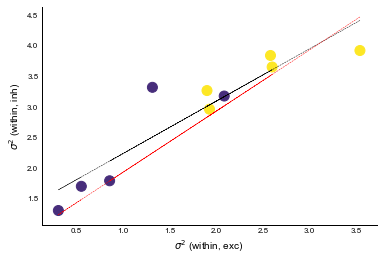

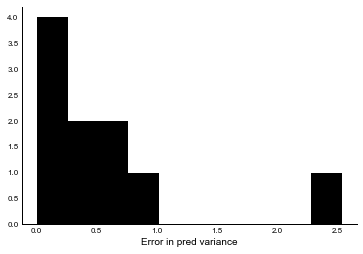

0.48378679597932195 0.041336304030678096


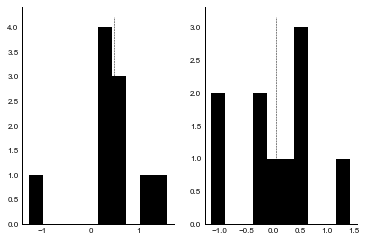

[ 1.60160272  0.22250555  0.62497924  0.43546631  0.43417683 -1.28615174
  1.09326254  0.65683966  0.36400509  0.69118176] [ 1.42014198  0.39926246 -0.90253637 -0.16057125 -0.37909844 -1.15581976
  0.03411301  0.51180021  0.1774174   0.46865379]


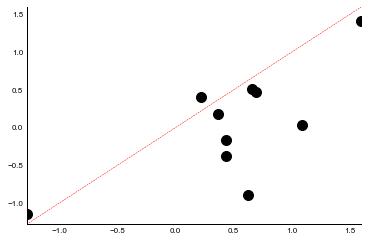

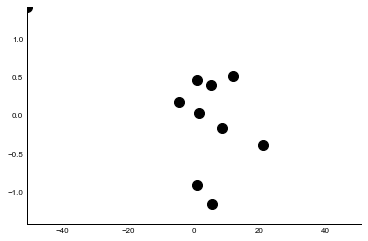

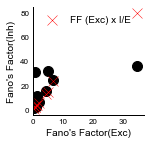

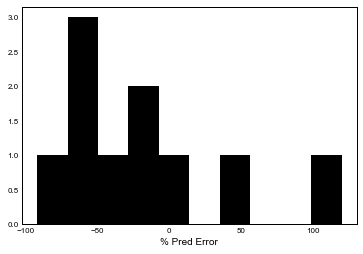

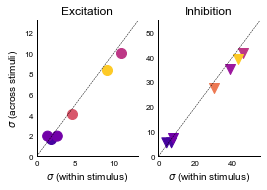

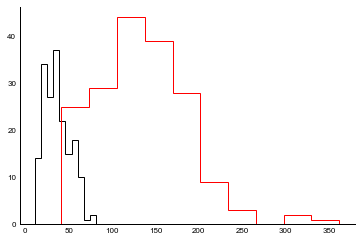

c2_EI 170720


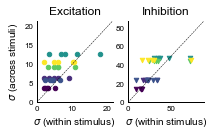

(1.2564327184381678, 18.678241603362455)
(5.738151392665487, 76.34487784277007)


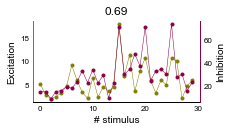

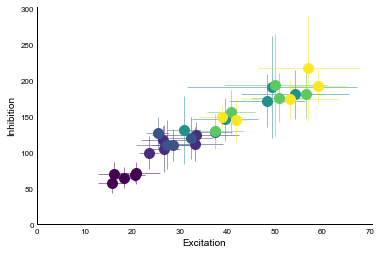

key is 1
key is 2
key is 3
key is 5
key is 7
key is 9


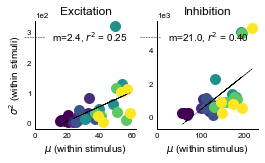

30 30
Correlation for sum of synaptic variance: 0.72190210628


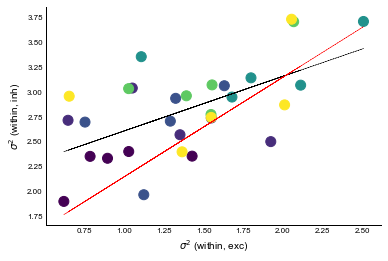

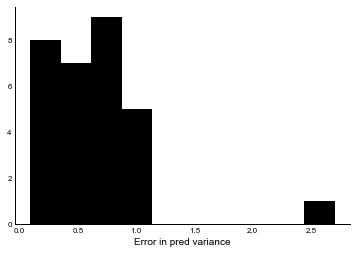

0.3140013485078352 0.2937615556983174


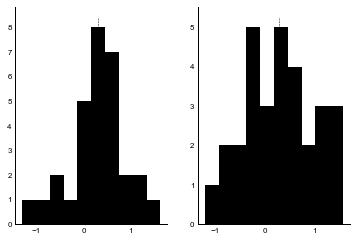

[ 0.83857652 -0.44752572  0.48761239  0.38754242 -0.19095804  1.21755055
  0.73902984  0.56812192  0.28627738  0.53716939  0.00376378  0.75171473
  0.27615215  0.41117811 -0.06435296  1.03192653  0.35275776 -0.70663222
 -0.07040252  0.10159842  0.53938492  0.71921554  1.22715954 -0.87695463
  0.19003083  1.63346962  0.29766956  0.33140814  0.15256487 -1.30500837] [ 0.83637581  0.51291041  1.59031678 -0.28281419 -0.93418182  0.19038646
  0.17394646 -0.55075645  0.30701828  1.1314929   1.15118788  0.34483866
 -0.60748924 -0.19672901 -0.08689659  1.18483672  0.30804178  0.25524669
 -0.14906092  1.55122531  0.72419185 -1.21560872  0.98372604 -0.12284841
  0.57607614  1.53629796  0.52826967 -0.66720166 -0.0811465  -0.17880563]


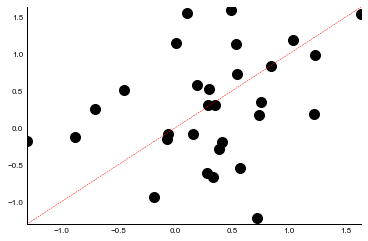

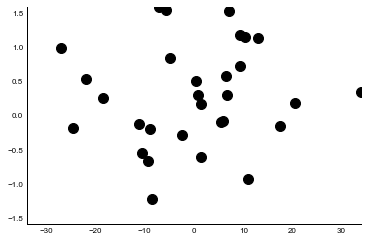

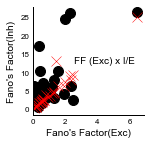

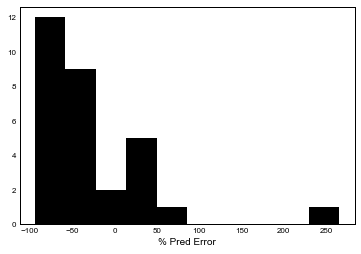

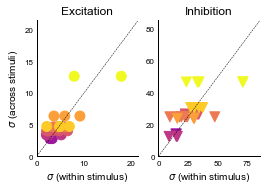

In [41]:
e_fano_fac = []
i_fano_fac = []
binned_e_within_across_ratio_pre = []
binned_i_within_across_ratio_pre = []
crossCorr_arr = []

for index, n in enumerate(neurons):

    e_cell_all_points = []
    i_cell_all_points = []
    numSqrWise_e = {}
    numSqrWise_i = {}
    
    for expType,expt in n:
        for sqr in expt:
#             if sqr in [1,2]:
                if (expType == 1):
                    feature = 1 #5 for min
                    for coord in expt[sqr].coordwise:
                        numSqrWise_e.setdefault(sqr,[]).append([-trial.feature[feature]*scalingFactor for trial in expt[sqr].coordwise[coord].trials])
                        e_cell_all_points.append([-trial.feature[feature]*scalingFactor for trial in expt[sqr].coordwise[coord].trials])
                            
                elif (expType == 2):
                    feature = 1 #0 for max
                    for coord in expt[sqr].coordwise:
                        numSqrWise_i.setdefault(sqr,[]).append([trial.feature[feature]*scalingFactor for trial in expt[sqr].coordwise[coord].trials])
                        i_cell_all_points.append([trial.feature[feature]*scalingFactor for trial in expt[sqr].coordwise[coord].trials])
    
    e_cell_all_points = np.array(e_cell_all_points)
    i_cell_all_points = np.array(i_cell_all_points)
    
    if len(e_cell_all_points) and len(i_cell_all_points):
        all_e_points = np.concatenate(e_cell_all_points)
        all_i_points = np.concatenate(i_cell_all_points)

        fig, ax = plt.subplots()
        ax.hist(all_e_points, histtype='step')
        ax.hist(all_i_points, histtype='step', color='r')
        simpleaxis(ax)
        plt.show()

        print(n.index, n.date)
        e_withinStimulusStd = {k:[np.std(j, ddof = 1) for j in numSqrWise_e[k]] for k in numSqrWise_e.keys()}
        e_withinStimulusVar = {k:[np.var( np.array(j), ddof = 1) for j in numSqrWise_e[k]] for k in numSqrWise_e.keys()}
        e_withinStimulusMean = {k:[np.mean(j) for j in numSqrWise_e[k]] for k in numSqrWise_e.keys()}
        e_acrossStimulusStd = {k:np.std(np.ravel(numSqrWise_e[k])) for k in numSqrWise_e.keys()}
        e_withinStimulusKurtosis = {k:[ss.skew(j) for j in numSqrWise_e[k]] for k in numSqrWise_e.keys()}

        i_withinStimulusStd = {k:[np.std(j, ddof = 1) for j in numSqrWise_i[k]] for k in numSqrWise_i.keys()}
        i_withinStimulusVar = {k:[np.var(np.array(j), ddof = 1) for j in numSqrWise_i[k]] for k in numSqrWise_i.keys()}
        i_withinStimulusMean = {k:[np.mean(j) for j in numSqrWise_i[k]] for k in numSqrWise_i.keys()}
        i_acrossStimulusStd = {k:np.std(np.ravel(numSqrWise_i[k])) for k in numSqrWise_i.keys()}
        i_withinStimulusKurtosis = {k:[ss.skew(j) for j in numSqrWise_i[k]] for k in numSqrWise_i.keys()}

        # Replicating the across variability and color to the length of the within list to plot and easy vector division later.
        sqrs , e_across, e_within, i_across, i_within, color_square = zip(*[(key, [e_acrossStimulusStd[key]]*len(e_withinStimulusStd[key]), e_withinStimulusStd[key], [i_acrossStimulusStd[key]]*len(i_withinStimulusStd[key]), i_withinStimulusStd[key], color_sqr[key]) for key in e_acrossStimulusStd.keys()])
        e_kurt, i_kurt = zip(*[(e_withinStimulusKurtosis[key], i_withinStimulusKurtosis[key]) for key in e_withinStimulusKurtosis.keys() ])


        ## Plotting by grouping with squares
        fig, (ax1,ax2) = plt.subplots(ncols=2)
        for across, within, c in zip(e_across, e_within, color_square):
            ax1.scatter(within, across, label='Exc', c = c, marker='o', s=20)
        for across, within, c in zip(i_across, i_within, color_square):
            ax2.scatter(within, across, label='Inh', c = c, marker='v', s=20)
        ax1.set_xlabel("$\sigma$ (within stimulus)")
        ax1.set_ylabel("$\sigma$ (across stimuli)")

        ax2.set_xlabel("$\sigma$ (within stimulus)")
        #ax2.set_ylabel("$\sigma$ (across stimuli)")

        ax1.set_xlim((0,1.2*np.max (np.concatenate([e_across, e_within]))))
        ax1.set_ylim((0,1.2*np.max (np.concatenate([e_across, e_within]))))

        ax2.set_xlim((0,1.2*np.max (np.concatenate([i_across, i_within]))))
        ax2.set_ylim((0,1.2*np.max (np.concatenate([i_across, i_within]))))

        ax1.plot((0,1.2*np.max (np.concatenate([e_across, e_within]))), (0,1.2*np.max (np.concatenate([e_across, e_within]))), '--')
        ax2.plot((0,1.2*np.max (np.concatenate([i_across, i_within]))), (0,1.2*np.max (np.concatenate([i_across, i_within]))), '--')
        simpleaxis([ax1,ax2])

        ax1.set_title("Excitation")
        ax2.set_title("Inhibition")

        fig.set_figwidth(3)
        fig.set_figheight(1.5)

        dump(fig,file('figures/supplementary/within_across_EI_raw_{}.pkl'.format(index),'wb'))
        plt.show()       
        
        
        ### Correlation plots for standard deviation exc and inh
        
        
        key_vector = e_withinStimulusMean.keys()
        e_withinStimulusVar_all = np.concatenate([e_withinStimulusStd[key] for key in key_vector])
        i_withinStimulusVar_all = np.concatenate([i_withinStimulusStd[key] for key in key_vector])
        
        plotlines, caplines, barlinecols = [], [], []
        
        fig, ax = plt.subplots()    
        plotline1  = ax.plot(np.arange(len(e_withinStimulusVar_all)), e_withinStimulusVar_all, '.-', markersize=6, label="Exc",c='olive')
        ax_copy = ax.twinx()
        plotline2  = ax_copy.plot(np.arange(len(i_withinStimulusVar_all)), i_withinStimulusVar_all, '.-', markersize=6, label="Inh",c='#8b0046')
        ax.set_xlabel("# stimulus")

#         caplines1[0].set_marker('_')
#         caplines1[0].set_markersize(5)
#         caplines2[0].set_marker('_')
#         caplines2[0].set_markersize(5)

        ax.spines['left'].set_color('olive')
        ax_copy.spines['right'].set_color('#8b0046')
        # lines = line_exc1 + line_exc2 + line_inh1 + line_inh2
        # labs = [l.get_label() for l in lines]
        # ax.legend(lines, labs, loc=0)

        simpleaxis(ax)
        simpleaxis(ax_copy,every=True)
        crossCorr = np.corrcoef(e_withinStimulusVar_all, i_withinStimulusVar_all)[0,1]
        crossCorr_arr.append(crossCorr)
        ax.set_title("{:.2f}".format(crossCorr))
        ax_copy.spines['right'].set_visible(True)
        ax_copy.get_yaxis().tick_right()

#         ax.set_ylim(ymin=-0.5, ymax=3.)
#         ax_copy.set_ylim(ymin=-0.5, ymax=14.)

#         ax.set_yticks(np.linspace(0,3.,3))
#         ax_copy.set_yticks(np.linspace(0,14.,3))

        ax.set_ylabel("Excitation")
        ax_copy.set_ylabel("Inhibition")

        fig.set_figheight(1.5)
        fig.set_figwidth(3)
        print(ax.get_ylim())
        print(ax_copy.get_ylim())
        dump(fig,file('figures/supplementary/corr_{}_{}.pkl'.format(n.index, n.date),'wb'))
        plt.show()

        # E-I scatter plots 
        
        fig, ax = plt.subplots()
        for k in e_withinStimulusMean.keys():
            ax.errorbar(e_withinStimulusMean[k], i_withinStimulusMean[k], xerr=e_withinStimulusStd[k], yerr=i_withinStimulusStd[k], c=color_sqr[k], fmt='o')
        simpleaxis(ax)
        ax.set_xlabel("Excitation")
        ax.set_ylabel("Inhibition")
        ax.set_xlim(xmin=0)
        ax.set_ylim(ymin=0)
        plt.show()
        
        fig, (ax1,ax2) = plt.subplots(ncols=2)
        for k in e_withinStimulusMean.keys():
            print("key is {}".format(k))
            ax1.scatter(e_withinStimulusMean[k], e_withinStimulusVar[k], c=color_sqr[k])
            ax2.scatter(i_withinStimulusMean[k], i_withinStimulusVar[k], c=color_sqr[k])

        key_vector = e_withinStimulusMean.keys()

        e_withinStimulusMean_all = np.concatenate([e_withinStimulusMean[key] for key in key_vector])
        i_withinStimulusMean_all = np.concatenate([i_withinStimulusMean[key] for key in key_vector])
        e_withinStimulusVar_all = np.concatenate([e_withinStimulusVar[key] for key in key_vector])
        i_withinStimulusVar_all = np.concatenate([i_withinStimulusVar[key] for key in key_vector])
        color_all = np.concatenate([[color_sqr[key]]*len(e_withinStimulusMean[key]) for key in key_vector])

        slope, intercept, r_value, p_value, std_err = ss.linregress(e_withinStimulusMean_all, e_withinStimulusVar_all)
        ax1.plot(e_withinStimulusMean_all, slope*np.array(e_withinStimulusMean_all) + intercept, '--', label="m={:.1f}, $r^2$ = {:.2f}".format(slope, r_value**2))

        slope, intercept, r_value, p_value, std_err = ss.linregress(i_withinStimulusMean_all, i_withinStimulusVar_all)
        ax2.plot(i_withinStimulusMean_all, slope*np.array(i_withinStimulusMean_all) + intercept, '--', label="m={:.1f}, $r^2$ = {:.2f}".format(slope, r_value**2))

        ax1.set_xlabel("$\mu$ (within stimulus)")
        ax1.set_ylabel("$\sigma^2$ (within stimuli)")

        ax2.set_xlabel("$\mu$ (within stimulus)")
        #ax2.set_ylabel("$\sigma$ (within stimuli)")
        ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        ax1.legend()
        ax2.legend()
        simpleaxis([ax1,ax2])
        ax1.set_xlim(xmin=0.)
        ax2.set_xlim(xmin=0.)
        ax1.set_title("Excitation")
        ax2.set_title("Inhibition")
        fig.set_figwidth(4)
        fig.set_figheight(2)
        plt.show()

        # E vs I var within plots
        print(len(i_withinStimulusVar_all), len(color_all))
        
        i_e_ratio_array = np.mean(i_withinStimulusMean_all/e_withinStimulusMean_all)
        
        predicted_i_withinStimulusVar_all = (i_e_ratio_array**2)*e_withinStimulusVar_all
        print("Correlation for sum of synaptic variance: {}".format(np.corrcoef(e_withinStimulusVar_all, i_withinStimulusVar_all)[0,1]))
        fig, ax = plt.subplots()
        ax.scatter(np.log10(e_withinStimulusVar_all), np.log10(i_withinStimulusVar_all), c=color_all)
        slope, intercept, r_value, p_value, std_err = ss.linregress(np.log10(e_withinStimulusVar_all), np.log10(i_withinStimulusVar_all))
        ax.plot(np.log10(e_withinStimulusVar_all), slope*np.log10(e_withinStimulusVar_all) + intercept, 'k--')
        ax.plot(np.log10(e_withinStimulusVar_all), np.log10(predicted_i_withinStimulusVar_all), 'r--')
        
        ax.set_xlabel("$\sigma^2$ (within, exc)")
        ax.set_ylabel("$\sigma^2$ (within, inh)")
        simpleaxis(ax)
        plt.show()
    
        # Error percentage of prediction
        
        error_var_array = np.abs(predicted_i_withinStimulusVar_all - i_withinStimulusVar_all)/i_withinStimulusVar_all
        
        fig, ax = plt.subplots()
        ax.hist(error_var_array)
        ax.set_xlabel("Error in pred variance")
        simpleaxis(ax)
        plt.show()
        
        # Kurtosis plots
        e_kurt = np.concatenate(e_kurt)
        i_kurt = np.concatenate(i_kurt)

        minKurt, maxKurt = np.min([np.min(e_kurt), np.min(i_kurt)]), np.max([np.max(e_kurt), np.max(i_kurt)])

        fig, (ax1,ax2) = plt.subplots(ncols=2)
        ax1.hist(e_kurt)
        ax2.hist(i_kurt)

        ax1.vlines(x=np.mean(e_kurt), ymin=ax1.get_ylim()[0], ymax=ax1.get_ylim()[1],linestyles='--')
        ax2.vlines(x=np.mean(i_kurt), ymin=ax2.get_ylim()[0], ymax=ax2.get_ylim()[1],linestyles='--')

        print (np.mean(e_kurt),np.mean(i_kurt))
        simpleaxis([ax1,ax2])
        plt.show()

        print( e_kurt, i_kurt)
        fig, ax = plt.subplots()
        ax.scatter(e_kurt, i_kurt)
        ax.plot((minKurt, maxKurt), (minKurt, maxKurt), 'r--')
        ax.set_xlim(minKurt, maxKurt)
        ax.set_ylim(minKurt, maxKurt)
        simpleaxis(ax)
        plt.show()

        mean_i_e = np.mean(i_withinStimulusMean_all)/np.mean(e_withinStimulusMean_all)

        fig, ax = plt.subplots()
        ax.scatter(i_withinStimulusMean_all - mean_i_e*e_withinStimulusMean_all, i_kurt)
        ax.set_xlim(-np.max(np.abs(i_withinStimulusMean_all - mean_i_e*e_withinStimulusMean_all)), np.max(np.abs(i_withinStimulusMean_all - mean_i_e*e_withinStimulusMean_all)))
        ax.set_ylim(-np.max(np.abs(i_kurt)), np.max(np.abs(i_kurt)))
    #     ax.plot([np.max(np.abs(i_kurt)),-np.max(np.abs(i_withinStimulusMean_all - mean_i_e*e_withinStimulusMean_all)),], [-np.max(np.abs(i_kurt)),np.max(np.abs(i_withinStimulusMean_all - mean_i_e*e_withinStimulusMean_all))],'--' )
        simpleaxis(ax)
        plt.show()

        # Individual fano's factor distribution

        e_fano_stimulus = []
        i_fano_stimulus = []
        i_by_e_stim = []
        fig, ax1 = plt.subplots()
        for k in e_withinStimulusMean.keys():
            e_fano_stimulus.append(np.array(e_withinStimulusVar[k])/np.array(e_withinStimulusMean[k]))
            i_fano_stimulus.append(np.array(i_withinStimulusVar[k])/np.array(i_withinStimulusMean[k]))
            i_by_e_stim.append(np.array(i_withinStimulusMean[k])/np.array(e_withinStimulusMean[k]))

        e_fano_stimulus = np.concatenate(e_fano_stimulus)
        i_fano_stimulus = np.concatenate(i_fano_stimulus)
        i_by_e_stim = np.concatenate(i_by_e_stim)
        pred_i_fano = np.array(e_fano_stimulus)*np.array(i_by_e_stim)

        slope, intercept, r_value, p_value, std_err = ss.linregress(e_fano_stimulus, i_fano_stimulus)
        ax1.scatter(e_fano_stimulus, i_fano_stimulus)
        ax1.scatter(e_fano_stimulus, pred_i_fano, marker='x', color='r', label='FF (Exc) x I/E')


        #ax1.plot(e_fano_stimulus, slope*np.array(e_fano_stimulus) + intercept, '--', label="m={:.1f}, $r^2$ = {:.2f}".format(slope, r_value**2))

        ax1.set_xlabel("Fano's Factor(Exc)")
        ax1.set_ylabel("Fano's Factor(Inh)")
        ax1.set_xlim(xmin=0.)
        simpleaxis(ax1)
        plt.legend()
        fig.set_figwidth(2)
        fig.set_figheight(2)
        plt.show()    

        error_fano = (pred_i_fano - i_fano_stimulus)*100/i_fano_stimulus

        fig, ax = plt.subplots()
        ax.hist(error_fano)
        ax.set_xlabel('% Pred Error')
        plt.show()

        for sqr, e_w, e_a, i_w, i_a in zip(sqrs, e_within, e_across, i_within ,i_across):
            e_within_across_ratio.setdefault(sqr, []).append(np.array(e_w)/np.array(e_a))
            i_within_across_ratio.setdefault(sqr, []).append(np.array(i_w)/np.array(i_a))

        cell_e_within_across_ratio.setdefault(index, []).append(np.concatenate(np.array(e_within)/np.array(e_across)))
        cell_i_within_across_ratio.setdefault(index, []).append(np.concatenate(np.array(i_within)/np.array(i_across)))

        ## Plotting by grouping with mean amplitude
        nbins = 10
        #Colorscheme for bins
        color_bins = [color for color in matplotlib.cm.plasma(np.linspace(0,1,nbins))]

        #e_maxBin = 1.2*np.max(np.concatenate(e_cell_all_points))

        e_maxBin = 50
        i_maxBin = 200

        e_coord_mean = np.mean(e_cell_all_points, axis=1)
        e_coord_std = np.std(e_cell_all_points, axis=1, ddof=1)

        bins = np.linspace(0, e_maxBin, nbins)
        e_indices = np.digitize(e_coord_mean, bins, right=True)

        e_within_bins = [e_coord_std[np.where(e_indices == key)] for key in range(nbins)]
        e_across_bins = [np.std(np.concatenate(e_cell_all_points[np.where(e_indices == key)])) if np.shape(np.where(e_indices == key))[1]>0 else np.nan for key in range(nbins)]

        #i_maxBin = 1.2*np.max(np.concatenate(i_cell_all_points))
        i_coord_mean = np.mean(i_cell_all_points, axis=1)
        i_coord_std = np.std(i_cell_all_points, axis=1, ddof=1)

        bins = np.linspace(0, i_maxBin, nbins)
        i_indices = np.digitize(i_coord_mean, bins, right=True)

        i_within_bins = [i_coord_std[np.where(i_indices == key)] for key in range(nbins)]
        i_across_bins = [np.std(np.concatenate(i_cell_all_points[np.where(i_indices == key)])) if np.shape(np.where(i_indices == key))[1]>0 else np.nan for key in range(nbins)]

        e_across = []
        e_color_bins = []
        for e_w, e_a, c in zip(e_within_bins, e_across_bins, color_bins):
            e_across.append(np.array([e_a]*len(e_w)))
            e_color_bins.append([c]*len(e_w))

        i_across = []
        i_color_bins = []
        for i_w, i_a, c in zip(i_within_bins, i_across_bins, color_bins):
            i_across.append(np.array([i_a]*len(i_w)))
            i_color_bins.append([c]*len(i_w))

        e_across = np.array(e_across)
        i_across = np.array(i_across)
        e_within = np.array(e_within_bins)
        i_within = np.array(i_within_bins)

        fig, (ax1,ax2) = plt.subplots(ncols=2)
        for across, within, c in zip(e_across, e_within, e_color_bins):
            ax1.scatter(within, across, label='Exc', c = c, marker='o')
            binned_e_within_across_ratio_pre.append(np.array(within)/np.array(across))
        for across, within, c in zip(i_across, i_within, i_color_bins):
            ax2.scatter(within, across, label='Inh', c = c, marker='v')
            binned_i_within_across_ratio_pre.append(np.array(within)/np.array(across))

        ax1.set_xlabel("$\sigma$ (within stimulus)")
        ax1.set_ylabel("$\sigma$ (across stimuli)")
        ax2.set_xlabel("$\sigma$ (within stimulus)")
        #ax2.set_ylabel("$\sigma$ (across stimuli)")

        e_maxAxis = np.max(np.concatenate([np.concatenate(e_across), np.concatenate(e_within)]))
        i_maxAxis = np.max(np.concatenate([np.concatenate(i_across), np.concatenate(i_within)]))

        ax1.set_xlim((0,1.2*e_maxAxis))
        ax1.set_ylim((0,1.2*e_maxAxis))

        ax2.set_xlim((0,1.2*i_maxAxis))
        ax2.set_ylim((0,1.2*i_maxAxis))

        ax1.plot([0,1.2*e_maxAxis], [0,1.2*e_maxAxis], '--')
        ax2.plot([0,1.2*i_maxAxis], [0,1.2*i_maxAxis], '--')
        simpleaxis([ax1,ax2])

        ax1.set_title("Excitation")
        ax2.set_title("Inhibition")

        fig.set_figwidth(4)
        fig.set_figheight(2.5)
        plt.show()

        e_cell_all_points = np.concatenate(e_cell_all_points)
        i_cell_all_points = np.concatenate(i_cell_all_points)

        e_fano_fac.append(np.var(e_cell_all_points, ddof=1)/np.mean(e_cell_all_points))
        i_fano_fac.append(np.var(i_cell_all_points, ddof=1)/np.mean(i_cell_all_points))

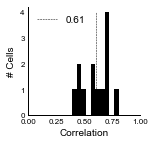

In [43]:
fig, ax = plt.subplots()
ax.hist(crossCorr_arr)
ax.vlines(x=np.mean(crossCorr_arr), ymin=0, ymax=4, linestyles='--', label='{:.2f}'.format(np.mean(crossCorr_arr)))
ax.set_xlim((0,1))
simpleaxis(ax)
ax.set_xlabel("Correlation")
ax.set_ylabel("# Cells")
plt.legend()
fig.set_figwidth(2)
fig.set_figheight(2)
dump(fig,file('figures/supplementary/std_corr_hist.pkl','wb'))
plt.show()

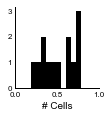

In [27]:
fig, ax = plt.subplots()
ax.hist(crossCorr_arr)
ax.set_xlim((0,1))
simpleaxis(ax)
ax.set_xlabel("Correlation")
ax.set_ylabel("# Cells")
fig.set_figwidth(1.5)
fig.set_figheight(1.5)
plt.show()

### Histogram over all cells shows that for 80% of all stimuli $\frac{\sigma(within)}{\sigma(across)} < 1$ where stimuli are grouped by # squares

In [11]:
from copy import deepcopy
copy_e_within_across_ratio =  deepcopy(e_within_across_ratio)
copy_i_within_across_ratio =  deepcopy(i_within_across_ratio)

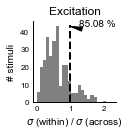

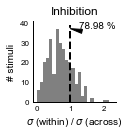

In [12]:
all_e_within_across_ratio = []
all_i_within_across_ratio = []
e_within_across_ratio = {}
i_within_across_ratio = {}

for sqr in copy_e_within_across_ratio.keys():
    e_within_across_ratio[sqr] = np.concatenate(copy_e_within_across_ratio[sqr]).flatten()
    i_within_across_ratio[sqr] = np.concatenate(copy_i_within_across_ratio[sqr]).flatten()
    all_e_within_across_ratio.append(copy_e_within_across_ratio[sqr])
    all_i_within_across_ratio.append(copy_i_within_across_ratio[sqr])
    sqrList.append(sqr)

e_within_across_ratio = np.copy(all_e_within_across_ratio)
i_within_across_ratio = np.copy(all_i_within_across_ratio)

all_e_within_across_ratio = np.concatenate(all_e_within_across_ratio).flatten()
all_i_within_across_ratio = np.concatenate(all_i_within_across_ratio).flatten()

frac_e_within_across_lower_than_one = float(len(np.where(all_e_within_across_ratio < 1.)[0]))/len(all_e_within_across_ratio)
frac_i_within_across_lower_than_one = float(len(np.where(all_i_within_across_ratio < 1.)[0]))/len(all_i_within_across_ratio)

bins = np.linspace(0,2.25,25)

fig, ax = plt.subplots()
n, bins, patches = ax.hist(all_e_within_across_ratio, bins=bins,color='gray')
ax.vlines(x=1.0, ymin=0., ymax=max(n)+1, linestyles='--', lw=2)
ax.set_xlabel("$\sigma$ (within) / $\sigma$ (across)")
ax.set_ylabel("# stimuli")
ax.annotate("{:.2f} %".format(frac_e_within_across_lower_than_one*1e2), xy=(1., max(n)), xytext=(1.25, max(n)),
            arrowprops=dict(facecolor='black', width=1, headwidth=4)
            )
simpleaxis(ax)
ax.set_title("Excitation")
fig.set_figwidth(1.5)
fig.set_figheight(1.5)
dump(fig,file('figures/supplementary/claudia_hist_exc.pkl'.format(index),'wb'))
plt.show()

fig, ax = plt.subplots()
n, bins, patches = ax.hist(all_i_within_across_ratio, bins=bins,color='gray')
ax.vlines(x=1.0, ymin=0., ymax=max(n)+2, linestyles='--', lw=2)
ax.set_xlabel("$\sigma$ (within) / $\sigma$ (across)")
ax.set_ylabel("# stimuli")
ax.annotate("{:.2f} %".format(frac_i_within_across_lower_than_one*1e2), xy=(1., max(n)), xytext=(1.25, max(n)),
            arrowprops=dict(facecolor='black', width=1, headwidth=4)
            )
simpleaxis(ax)
ax.set_title("Inhibition")
fig.set_figwidth(1.5)
fig.set_figheight(1.5)
dump(fig,file('figures/supplementary/claudia_hist_inh.pkl'.format(index),'wb'))
plt.show()

In [13]:
copy_e_within_across_ratio

{1: [array([0.48168362, 0.40594507, 0.32424915, 0.34032722, 0.45710402]),
  array([0.58331032, 0.33513107, 0.42763029, 0.61396036, 0.40590453]),
  array([0.47421451, 0.17752844, 0.94241044, 0.42782375, 0.44371402]),
  array([0.81569023, 0.06790629, 1.22180245, 0.22406426, 0.65341643]),
  array([1.39323104, 0.75565289, 0.55097051, 0.66616488, 0.88092009])],
 2: [array([0.07746265, 0.345181  , 0.75638198, 0.17127721, 0.04217104]),
  array([0.17543029, 0.84258834, 0.89227671, 0.20579213, 0.21179574]),
  array([1.38006357, 0.3731275 , 0.94722527, 0.90307375, 1.41525899]),
  array([0.51658593, 0.50946194, 0.15832487, 0.87898117, 0.36496317]),
  array([0.36505659, 1.45929204, 0.51706961, 0.50382958, 0.97056774]),
  array([0.08511978, 0.64898357, 0.61280705, 0.22884495, 0.22916813]),
  array([0.30021942, 0.50871467, 1.2324272 , 0.1596312 , 0.21185988]),
  array([0.73632324, 1.41997479, 0.92345818, 0.52153979, 0.32768854])],
 3: [array([0.62269669, 0.90768038, 0.51989552, 0.92612145, 0.3457577

### Squarewise histogram shows that this is independent of number of stimulus squares.

6 6


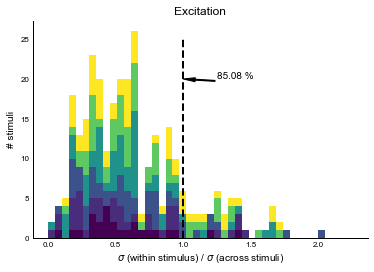

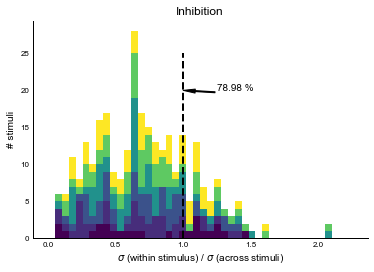

In [116]:
bins = np.linspace(0,2.25,45)
fig, ax = plt.subplots()
color = [color_sqr[sqr] for sqr in set(sqrList)]
print( len(color), len(e_within_across_ratio))
ax.hist(e_within_across_ratio, bins=bins, stacked=True, histtype='bar', color=color)
ax.vlines(x=1.0, ymin=0., ymax=25., linestyles='--', lw=2)
ax.set_xlabel("$\sigma$ (within stimulus) / $\sigma$ (across stimuli)")
ax.set_ylabel("# stimuli")
ax.annotate("{:.2f} %".format(frac_e_within_across_lower_than_one*1e2), xy=(1., 20), xytext=(1.25, 20),
            arrowprops=dict(facecolor='black', width=1, headwidth=4)
            )
simpleaxis(ax)
ax.set_title("Excitation")
plt.show()

fig, ax = plt.subplots()
ax.hist(i_within_across_ratio, bins=bins, stacked=True, histtype='bar', color=[color_sqr[sqr] for sqr in sqrList])
ax.vlines(x=1.0, ymin=0., ymax=25., linestyles='--', lw=2)
ax.set_xlabel("$\sigma$ (within stimulus) / $\sigma$ (across stimuli)")
ax.set_ylabel("# stimuli")
ax.annotate("{:.2f} %".format(frac_i_within_across_lower_than_one*1e2), xy=(1., 20), xytext=(1.25, 20),
            arrowprops=dict(facecolor='black', width=1, headwidth=4)
            )
simpleaxis(ax)
ax.set_title("Inhibition")
plt.show()

In [117]:
print([sqr for sqr in set(sqrList)], e_within_across_ratio)

[1, 2, 3, 5, 7, 9] [list([array([0.48168362, 0.40594507, 0.32424915, 0.34032722, 0.45710402]), array([0.58331032, 0.33513107, 0.42763029, 0.61396036, 0.40590453]), array([0.47421451, 0.17752844, 0.94241044, 0.42782375, 0.44371402]), array([0.81569023, 0.06790629, 1.22180245, 0.22406426, 0.65341643]), array([1.39323104, 0.75565289, 0.55097051, 0.66616488, 0.88092009])])
 list([array([0.07746265, 0.345181  , 0.75638198, 0.17127721, 0.04217104]), array([0.17543029, 0.84258834, 0.89227671, 0.20579213, 0.21179574]), array([1.38006357, 0.3731275 , 0.94722527, 0.90307375, 1.41525899]), array([0.51658593, 0.50946194, 0.15832487, 0.87898117, 0.36496317]), array([0.36505659, 1.45929204, 0.51706961, 0.50382958, 0.97056774]), array([0.08511978, 0.64898357, 0.61280705, 0.22884495, 0.22916813]), array([0.30021942, 0.50871467, 1.2324272 , 0.1596312 , 0.21185988]), array([0.73632324, 1.41997479, 0.92345818, 0.52153979, 0.32768854])])
 list([array([0.62269669, 0.90768038, 0.51989552, 0.92612145, 0.3457

### Cell-wise histogram shows that cells don't cluster for their across/within ratios.

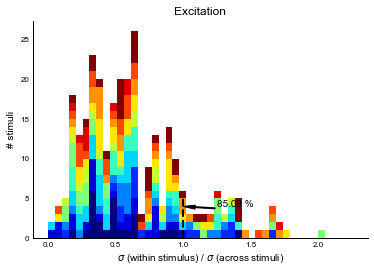

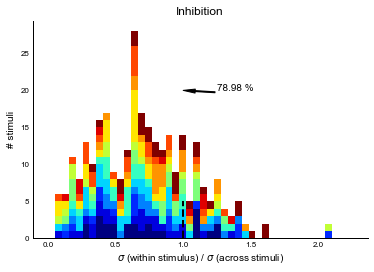

In [118]:
cell_e_within_across_ratio, cell_i_within_across_ratio, neuron_indices = zip(*[(cell_e_within_across_ratio[key][0], cell_i_within_across_ratio[key][0], key) for key in cell_e_within_across_ratio.keys()])
bins = np.linspace(0,2.25,45)
fig, ax = plt.subplots()
ax.hist(cell_e_within_across_ratio, bins=bins, stacked=True, histtype='bar', color=[color_cell[index] for index in neuron_indices])
ax.vlines(x=1.0, ymin=0., ymax=5., linestyles='--', lw=2)
ax.set_xlabel("$\sigma$ (within stimulus) / $\sigma$ (across stimuli)")
ax.set_ylabel("# stimuli")
ax.annotate("{:.2f} %".format(frac_e_within_across_lower_than_one*1e2), xy=(1., 4), xytext=(1.25, 4),
            arrowprops=dict(facecolor='black', width=1, headwidth=4)
            )
simpleaxis(ax)
ax.set_title("Excitation")
plt.show()

fig, ax = plt.subplots()
ax.hist(cell_i_within_across_ratio, bins=bins, stacked=True, histtype='bar',  color=[color_cell[index] for index in neuron_indices])
ax.vlines(x=1.0, ymin=0., ymax=5., linestyles='--', lw=2)
ax.set_xlabel("$\sigma$ (within stimulus) / $\sigma$ (across stimuli)")
ax.set_ylabel("# stimuli")
ax.annotate("{:.2f} %".format(frac_i_within_across_lower_than_one*1e2), xy=(1., 20), xytext=(1.25, 20),
            arrowprops=dict(facecolor='black', width=1, headwidth=4)
            )
simpleaxis(ax)
ax.set_title("Inhibition")
plt.show()

### Histogram over all cells shows that for 70% of all stimuli $\frac{\sigma(within)}{\sigma(across)} < 1$ where stimuli are grouped by binning by amplitude.

There is a clear effect of binning on this ratio. This is understandable, given that as amplitudes change, these reflect in increasing of the within group noise. This implies to a large extent, increase in the number of synapses that are impinging on CA1, which in turn implies larger noise due to release probability. Now, as the bin size gets larger, the across stimulus change due to release probability will become larger than the within stimulus noise due to release probability. At this point, the bin-size for E has been set as 100 pA and for Inhibition 200 pA. 

0.670731707317 0.647058823529


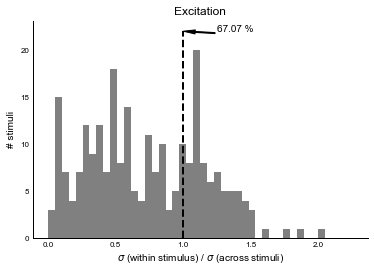

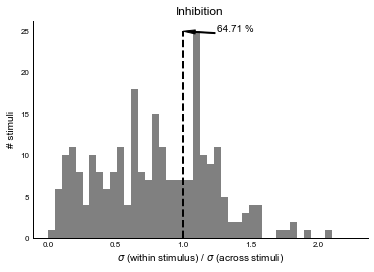

In [119]:
binned_e_within_across_ratio = np.concatenate(binned_e_within_across_ratio_pre)
binned_i_within_across_ratio = np.concatenate(binned_i_within_across_ratio_pre)

frac_binned_e_within_across_lower_than_one = float(len(np.where(binned_e_within_across_ratio < 1.)[0]))/len(binned_e_within_across_ratio)
frac_binned_i_within_across_lower_than_one = float(len(np.where(binned_i_within_across_ratio < 1.)[0]))/len(binned_i_within_across_ratio)

print(frac_binned_e_within_across_lower_than_one, frac_binned_i_within_across_lower_than_one)

bins = np.linspace(0,2.25, 45)
fig, ax = plt.subplots()
ax.hist(binned_e_within_across_ratio, bins=bins, color='gray')
ax.vlines(x=1.0, ymin=0., ymax=22., linestyles='--', lw=2)
ax.set_xlabel("$\sigma$ (within stimulus) / $\sigma$ (across stimuli)")
ax.set_ylabel("# stimuli")
ax.annotate("{:.2f} %".format(frac_binned_e_within_across_lower_than_one*1e2), xy=(1., 22), xytext=(1.25, 22),
            arrowprops=dict(facecolor='black', width=1, headwidth=4)
            )
simpleaxis(ax)
ax.set_title("Excitation")
plt.show()

fig, ax = plt.subplots()
ax.hist(binned_i_within_across_ratio, bins=bins, color='gray')
ax.vlines(x=1.0, ymin=0., ymax=25., linestyles='--', lw=2)
ax.set_xlabel("$\sigma$ (within stimulus) / $\sigma$ (across stimuli)")
ax.set_ylabel("# stimuli")
ax.annotate("{:.2f} %".format(frac_binned_i_within_across_lower_than_one*1e2), xy=(1., 25), xytext=(1.25, 25),
            arrowprops=dict(facecolor='black', width=1, headwidth=4)
            )
simpleaxis(ax)
ax.set_title("Inhibition")
plt.show()### Histogram over all cells shows that for 80% of all stimuli $\frac{\sigma(within)}{\sigma(across)} < 1$ where stimuli are grouped by binning on mean stimulus amplitude

### Binwise histogram hints that dependence of this ratio on stimulus amplitude.

The above argument is further strengthened by the fact that as the amplitude increases, the change in release probability is larger. Yellower colors below depict bins with larger absolute amplitude. This is a weak dependence, might even be that there is no real trend, but perhaps some lead to think about what this might mean.

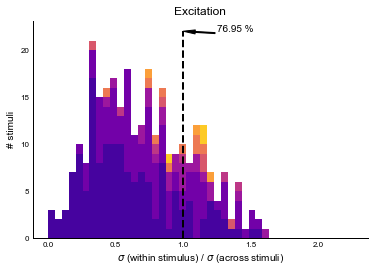

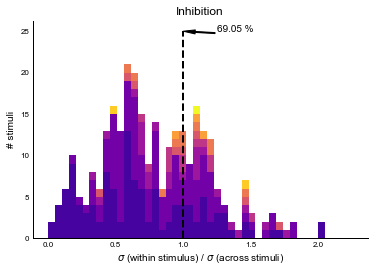

In [15]:
e_cell_bin_within_across_matrix = (np.reshape(binned_e_within_across_ratio_pre,(13,10)))
i_cell_bin_within_across_matrix = (np.reshape(binned_i_within_across_ratio_pre,(13,10)))

binwise_e_cell_within_across = []
binwise_i_cell_within_across = []

for binNum in range(e_cell_bin_within_across_matrix.shape[1]):
    binwise_e_cell_within_across.append(np.concatenate(e_cell_bin_within_across_matrix[:, binNum]))
    binwise_i_cell_within_across.append(np.concatenate(i_cell_bin_within_across_matrix[:, binNum]))
    
bins = np.linspace(0,2.25,45)
fig, ax = plt.subplots()
ax.hist(binwise_e_cell_within_across, bins=bins, stacked=True, histtype='bar', color=color_bins)
ax.vlines(x=1.0, ymin=0., ymax=22., linestyles='--', lw=2)
ax.set_xlabel("$\sigma$ (within stimulus) / $\sigma$ (across stimuli)")
ax.set_ylabel("# stimuli")
ax.annotate("{:.2f} %".format(frac_binned_e_within_across_lower_than_one*1e2), xy=(1., 22), xytext=(1.25, 22),
            arrowprops=dict(facecolor='black', width=1, headwidth=4)
            )
simpleaxis(ax)
ax.set_title("Excitation")
plt.show()

fig, ax = plt.subplots()
ax.hist(binwise_i_cell_within_across, bins=bins, stacked=True, histtype='bar', color=color_bins)
ax.vlines(x=1.0, ymin=0., ymax=25., linestyles='--', lw=2)
ax.set_xlabel("$\sigma$ (within stimulus) / $\sigma$ (across stimuli)")
ax.set_ylabel("# stimuli")
ax.annotate("{:.2f} %".format(frac_binned_i_within_across_lower_than_one*1e2), xy=(1., 25), xytext=(1.25, 25),
            arrowprops=dict(facecolor='black', width=1, headwidth=4)
            )
simpleaxis(ax)
ax.set_title("Inhibition")
plt.show()

# Analytical formulation of the synaptic output using a bernoulli and a gaussian process.

We can think of individual synapses as product of 2 random variables. 1: Release probabilities (p) as a bernoulli process (coin flips with certain probability) and 2: synaptic weights drawn from a (say gamma) distribution. This results in a unitary at the postsynapse. These unitaries can then sum up to give rise to PSPs, which are sums of these random variables.

Formally,

$X = B(p)$

$Y = G(\bar{w}, \tilde{w})$ (This can be arbitrary distributions, not necessarily Gaussian)

Here,

$B$ is Binomial random process with success probability $p$,
$G$ is a Gaussian random process with mean $\bar{w}$, and variance $\tilde{w}$

Now $V(X,Y) = {E(X)}^2 V(Y) + {E(Y)}^2 V(X) + V(X)V(Y)$

Or, 
$V(X,Y) = \bar{w}^2.p.(1-p) + p^2.\tilde{w} + p.(1-p).\tilde{w}$

Canceling and rearranging, 

$V(X,Y) = p.(\bar{w}^2.(1- p) + \tilde{w})$

Let the number of active synapses by n. Then, the total variance of n such processes would be:

$\sum\limits_{}^{n} {V(X,Y)} = np.(\bar{w}^2.(1- p) + \tilde{w})$ 

Similarly, mean EPSC from n active synapses will be $\sum\limits_{}^{n} {E(X,Y)} = \sum\limits_{}^{n}{E(X).E(Y)} = \sum\limits_{}^{n} p.\bar{w} = np\bar{w}$

Using this framework, we can think about if there were to be tuning of weights, what signatures should we find in the data. For example, the fano factor turns out immediately to be independent of n (number of synapses) = 


$\frac{V(X,Y)}{E(X,Y)} = \frac{np.(\bar{w}^2.(1- p) + \tilde{w})}{np\bar{w}} = (1-p)\bar{w} + \frac{\tilde{w}}{\bar{w}}$

We can rewrite this now for both excitatory and inhibitory inputs.

$FF_e = \frac{V_e(X,Y)}{E_e(X,Y)} = \frac{n_e p_e.(\bar{w_e}^2.(1- p_e) + \tilde{w_e})}{n_e p_e \bar{w_e}} = (1-p_e)\bar{w_e} + \frac{\tilde{w_e}}{\bar{w_e}}$

And for inhibitory, again, 

$FF_i = \frac{V_i(X,Y)}{E_i(X,Y)} = (1-p_i)\bar{w_i} + \frac{\tilde{w_i}}{\bar{w_i}}$

Therefore, without the numbers of afferents in, the fano factors of E and I inputs should not scale with each other, unless there is weight tuning.

Let's assess what $\frac{FF_i}{FF_e}$ gives us with and without weight tuning:

$ \frac{(1-p_i)\bar{w_i} + \frac{\tilde{w_i}}{\bar{w_i}}}{(1-p_e)\bar{w_e} + \frac{\tilde{w_e}}{\bar{w_e}}}$

First, we define a variable to quantify tuning error, such that it parameterizes the system from a global balanced state to a detailed balanced state. Let this variable be $\rho$.


We define detailed balanced as a state where all synaptic weights are tuned to a given I/E ratio, as opposed to a global balanced state, with only average synaptic weights balanced. That is, for detailed balance $\vec{W_i} = k.\vec{W_e} $, whereas for global balance, only $\bar{W_i} = k.\bar{W_e}$

So now, to go from perfect correlation to no correlation between 2 standard normal vectors $x$ and $y$, we use the above defined $\rho$, such that $y = \rho.x + \mathcal{N}(0, 1-\rho^2)$. Here, at $\rho=1$, there is perfect correlation, and at $\rho=0$, there is no correlation.

From this, we can build weight vector $W_i$ from $W_e$, by converting the standard normal $x$ into $W_e$ and $y$ into $W_i$. 

We start with $\frac{w_e - \bar{w_e}}{\sqrt{\tilde{w_e}}} \times \rho + \mathcal{N}(0, 1-\rho^2)$

By scaling and adding an intercept to it, 

$w_i = k \times \bigg\{ \big( \frac{w_e - \bar{w_e}}{\sqrt{\tilde{w_e}}} \times \rho + \mathcal{N}(0, 1-\rho^2) \big) \times \sqrt{\tilde{w_e}} + \bar{w_e}\bigg\}$

And so for the whole vector, 

$\vec{W_i} = k \bigg\{ \big( \frac{\vec{W_e} - \bar{W_e}}{\sqrt{\tilde{W_e}}} \times \rho + \mathcal{N}(0, 1-\rho^2) \big) \times \sqrt{\tilde{W_e}} + \bar{W_e}\bigg\}$

This can be simplified to:

$\vec{W_i} = k \times \bigg\{ \vec{W_e}.\rho +  \bar{W_e}.(1-\rho) + \mathcal{N}(0, \tilde{W_e}.(1-\rho^2)) \bigg\}$

This can now be looked at in cases of perfect weight tuning, and without weight tuning:

At $\rho=0$,  $\vec{W_i} =  k.\bar{W_e} + \mathcal{N}(0, k^2\tilde{W_e})$, which implies global balance and untuned weights. 

At $\rho=1$,  $\vec{W_i} = k \vec{W_e}$, which implies detailed balance and perfectly tuned weights.

For $ 0 < \rho < 1$, $\rho$ denotes the correlation between the inhibitory and excitatory synaptic weights.

From here, it can be noted that $\bar{W_i} = k.\bar{W_e}$ and $\tilde{W_i} = k^2\tilde{W_e}$ 

Now going back to Fano factor calculations, 

$FF_i = (1-p_i)\bar{W_i} + \frac{\tilde{W_i}}{\bar{W_i}} = k\times \big((1-p_i)(\bar{W_e}) + \frac{\tilde{W_e}}{ \bar{W_e}}\big)$

and $FF_e = (1-p_e)\bar{W_e} + \frac{\tilde{W_e}}{\bar{W_e}} $

Therefore, $\frac{FF_i}{FF_e} = k\times {\frac{(1-p_i)\bar{W_e} + \frac{\tilde{W_e}}{\bar{W_e}}}{(1-p_e)\bar{W_e} + \frac{\tilde{W_e}}{\bar{W_e}}}}$

If $\tilde{W_E} >> \bar{W_E}, \frac{FF_i}{FF_e} \to k$


$FF_i = (1-p_i)\bar{W_i} + \frac{\tilde{W_i}}{\bar{W_i}} = k\times \big((1-p_i)(\bar{W_e}) + \frac{\tilde{W_e}}{ \bar{W_e}}\big)$

Therefore, $\frac{FF_i}{FF_e} = k\times {\frac{(1-p_i)\bar{W_e} + \frac{\tilde{W_e}}{\bar{W_e}}}{(1-p_e)\bar{W_e} + \frac{\tilde{W_e}}{\bar{W_e}}}}$

If $\tilde{W_E} >> \bar{W_E}, \frac{FF_i}{FF_e} \to k$

### Simulation to check the above

In [262]:
def generatePSC(w_e, w_i, p_E, p_I, trials=1):
    '''Returns one PSC worth of input'''
    
    W_E, W_I = [], []
    numSyns_E =  []
    numSyns_I =  []
    
    for j in range(trials):
        N_E = len(w_e)
        N_I = len(w_i)

        # Bernoulli process for release probability
        active_e = np.random.binomial(1, p_E, N_E)
        active_i = np.random.binomial(1, p_I, N_I)

        W_E.append(active_e.dot(w_e))
        W_I.append(active_i.dot(w_i))
        numSyns_E.append(np.sum(active_e))
        numSyns_I.append(np.sum(active_i))

    return W_E, W_I, numSyns_E, numSyns_I

def getTunedInhibition(w_e, rho, k, minResolvable=None):
    ''' Another method'''
    sorted_indices = np.argsort(w_e)
    old_sorting = np.argsort(sorted_indices)
    
    if not minResolvable:
        minResolvable = min(w_e)

    minDiff = np.max([np.min(np.diff(w_e[sorted_indices])), minResolvable])

    bins = np.arange(w_e[sorted_indices[0]], w_e[sorted_indices[-1]]+minDiff, minDiff)

    result = np.digitize(w_e[sorted_indices], bins)
    L = len(bins)
    
    shuffle_length = int((L - 1) * (1-rho) + 1)
    
    shuffled_sorted_indices = []

    for binIndex in range(1,L+1,shuffle_length):
        if len(old_sorting):
            shuffled_sorted_indices.append(np.random.permutation(sorted_indices[np.where((result >= binIndex) & (result < binIndex + shuffle_length))[0]]))
    
    w_i = k* w_e[np.concatenate(shuffled_sorted_indices)]
    w_i = w_i[old_sorting]
    
    return w_i

# def getTunedInhibition(w_e, rho, k, normal='True'):
#     '''Returns tuned inhibition with a given I/E ratio. Only for a normally distributed weight distribution. Can do it for general case.'''
#     if normal:
#         return k * (w_e*rho + np.mean(w_e)*(1-rho) + np.random.normal( 0, np.var(w_e)*(1-rho**2), len(w_e)) )

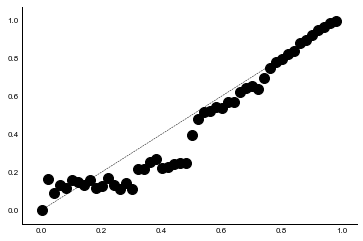

In [10]:
N_E = 1000
w_e_mean = 0.2
w_e_var = 1.5

w_e = np.random.lognormal(w_e_mean, w_e_var, N_E)

rho_arr = np.arange(0,1,0.02)
corr_arr = []
k = 1

for rho in rho_arr:
    w_i= getTunedInhibition(w_e, rho, k)
    corr_arr.append(np.corrcoef(w_e, w_i)[0,1])

fig, ax = plt.subplots()
ax.scatter(rho_arr, corr_arr)
ax.plot([0,1], [0,1], '--')
# ax.plot(w_e[sorted_indices]/w_e[sorted_indices][-1], np.cumsum(result)/np.cumsum(result)[-1])
simpleaxis(ax)
plt.show()

In [198]:
def returnCorrelationMatrixFromSynapticInput(N_E=1000, N_I=1000, p_E=0.2, p_I=0.8, k=2, rho_steps=9,
                                             var_steps=9, max_syn = 20, minResolvable = 0.5, num_syn = 50,
                                             runs=50, numTrials=20, corrType='var'):

    '''
    N_E, N_I = Number of afferents
    p_E, p_I = Release probs
    k = I/E ratio for the unitary synaptic distribution.

    rho_steps = samples of tuning parameter rho

    max_syn = Number of active synapses
    max_syn = Maximum number of active synapses
    num_syn = Number of samples from active synapses
    minResolvable = Minimum resolvable current for tuning
    '''

    # Normal synaptic weights, normal dist parameters. Keep the scale.
    w_e_mean = -0.39 # shape

    #var_arr = np.logspace(-1, 1, num=var_steps, base=2) #scale
    var_arr = np.linspace(0.5, 1.0, num=var_steps) #scale

    scalingWeightFactor = 1. #0.25

    correlation_matrix = np.zeros((var_steps, rho_steps))
    w_e_var_true = np.zeros((runs, var_steps))
    w_e_mean_true = np.zeros((runs, var_steps))
    w_ei_corr = np.zeros((var_steps, rho_steps))
    
    runs = 50
    run_mat = np.zeros((var_steps, rho_steps))
    for run in range(runs):
        for i, w_e_var in enumerate(var_arr):

            # Unitary synaptic distribution
            w_e = np.random.lognormal(w_e_mean, w_e_var, N_E)/scalingWeightFactor
            w_e_var_true[run,i] = np.var(w_e, ddof=1)
            w_e_mean_true[run,i] = np.mean(w_e)
            #w_e = np.random.normal(w_e_mean, w_e_var, N_E)
            #w_e -= np.min(w_e)

        #     fig,ax = plt.subplots(ncols=rho_steps,sharex=True, sharey=True)
        #     fig2,ax2 = plt.subplots(ncols=rho_steps,sharex=True, sharey=True)
        #     fig3,ax3 = plt.subplots(ncols=rho_steps,sharex=True, sharey=True)
        #     fig4,ax4 = plt.subplots(ncols=rho_steps,sharex=True, sharey=True)
        #     fig5,ax5 = plt.subplots(ncols=rho_steps,sharex=True, sharey=True)

            for j, rho in enumerate(rho_arr):
                w_i = getTunedInhibition(w_e, rho, k, minResolvable)
                #print(np.mean(w_e), np.var(w_e))
        #         print("Desired correlation: {}, actual correlation: {}".format(rho, np.corrcoef(w_e, w_i)[0,1]))
                numTrials = 30

                W_exc_mean, W_inh_mean = [], []
                numE, numI = [], [] 
                W_exc_std, W_inh_std = [], []
                W_exc, W_inh = [], []

                numSynpaseRange = np.random.choice(max_syn, num_syn) + 1
                #numSynpaseRange = np.arange(max_syn) + 1
                for n_e in numSynpaseRange:
                    chosen_synapses = random.sample(range(len(w_e)), n_e)

                    w_e_subset = w_e[chosen_synapses]
                    w_i_subset = w_i[chosen_synapses]

                    w_exc, w_inh, num_e, num_i = generatePSC(w_e_subset, w_i_subset, p_E, p_I, numTrials)

                    W_exc_mean.append(np.mean(w_exc))
                    W_inh_mean.append(np.mean(w_inh))

                    numE.append(np.mean(num_e))
                    numI.append(np.mean(num_i))

                    W_exc_std.append(np.std(w_exc, ddof=1))
                    W_inh_std.append(np.std(w_inh, ddof=1))
                    
                    W_exc.append(w_exc)
                    W_inh.append(w_inh)
                    
            #         W_exc = np.concatenate([W_exc])
            #         W_inh = np.concatenate([W_inh])
                W_exc_std = np.array(W_exc_std)
                W_inh_std = np.array(W_inh_std)
                W_exc_mean = np.array(W_exc_mean)
                W_inh_mean = np.array(W_inh_mean)
                
                W_exc = np.concatenate(W_exc)
                W_inh = np.concatenate(W_inh)
        #         print("Correlation for synaptic sum: {}".format(np.corrcoef(W_exc, W_inh)[0,1]))
        #         print("Correlation for synaptic variance: {}\n".format(np.corrcoef(W_exc_std**2, W_inh_std**2)[0,1]))
                if corrType == 'var':
                    correlation_matrix[i,j] += np.corrcoef(W_exc_std**2, W_inh_std**2)[0,1]
                elif corrType == 'rsquare':
                    slope, intercept, rval, pval, stderr = ss.linregress(W_exc_mean, W_inh_mean)
                    correlation_matrix[i,j] += rval**2
                coeff_wts = np.corrcoef(w_exc, w_inh)[0,1]
                w_ei_corr[i,j] += np.corrcoef(w_e, w_i)[0,1]
                numE = np.array(numE)

        #         ax[j].scatter(W_exc, W_inh, c=numE, cmap = plt.cm.viridis)
        #         ax[j].errorbar(W_exc, W_inh, xerr=W_exc_std, yerr=W_inh_std, fmt=None, marker=None, mew=0)
        #         ax2[j].scatter(W_exc, W_inh_std**2,  c=numE, cmap = plt.cm.viridis)
        #         ax3[j].scatter(W_inh, W_exc_std**2, c=numI, cmap = plt.cm.viridis)
        #         ax4[j].scatter(np.log10(W_exc_std**2), np.log10(W_inh_std**2), c=numE, cmap = plt.cm.viridis)
        #         ax5[j].scatter(W_exc_std**2/W_exc, W_inh_std**2/W_inh)

            #     ax4[j].set_xlim(-5,10.)
            #     ax4[j].set_ylim(-5,10.)

        #     max_ax = np.max([ax[0].get_xlim()[1], ax[0].get_ylim()[1]])
        #     for axis in fig.axes:
        #         axis.set_xlim(xmax=max_ax)
        #         axis.set_ylim(ymax=max_ax)

        #     figs = [fig, fig2, fig3, fig4, fig5]
        #     axes = [ax, ax2, ax3, ax4, ax5]
        #     for figure, axis in zip(figs, axes):
        #         simpleaxis(axis)
        #         figure.set_figwidth(len(rho_arr)*figure.get_figheight())

        #     plt.show()
    correlation_matrix/=runs
    w_ei_corr/=runs
    w_e_var_true = np.mean(w_e_var_true, axis=0)
    w_e_mean_true = np.mean(w_e_mean_true, axis=0)
    w_ei_corr = np.average(w_ei_corr,axis=0)
    return (correlation_matrix, w_e_var_true, w_e_mean_true, w_ei_corr)

In [219]:
def drawHeatmapCorrelationMat(correlation_matrix, rho_arr, var_arr, colorNormalize='max'):
    fig, ax = plt.subplots()
    if colorNormalize == 'max':
        vmax = np.max(correlation_matrix)
    else:
        vmax = 1.
    cbar = ax.imshow(correlation_matrix, cmap='magma',origin='lower', vmin=0., vmax=vmax)
    ax.set_xlabel("$\\rho$")
    ax.set_ylabel("$\\sigma^2_{exc}/\\mu_{exc}$")

    ax.set_xticks(range(0,len(rho_arr), 4))
    ax.set_yticks(range(0,len(var_arr), 4))

    ax.set_xticklabels(np.round(rho_arr,2)[::4])
    ax.set_yticklabels(np.round(var_arr,2)[::4])

    plt.colorbar(cbar, label="avg. correlation")
    plt.show()

# Start the binIndex in getTunedInhibition from 0 to 1?

### Default parameters with 20 max synapses and I/E ratio = 2

In [272]:
correlation_matrix_1, W_e_var, W_e_mean_true, true_corr_array = returnCorrelationMatrixFromSynapticInput()

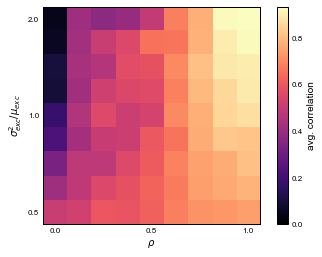

In [273]:
drawHeatmapCorrelationMat(correlation_matrix, rho_arr, var_arr)

### Default parameters with 20 max synapses and I/E ratio = 3

In [270]:
correlation_matrix_4,  W_e_var, W_e_mean_true, true_corr_array = returnCorrelationMatrixFromSynapticInput(max_syn=20, k=3)

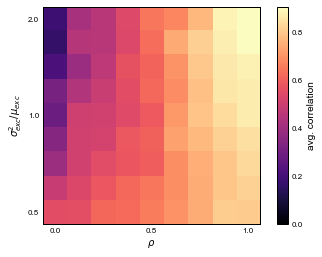

In [271]:
drawHeatmapCorrelationMat(correlation_matrix_4, rho_arr, var_arr)

### Default parameters with 10 max synapses and I/E ratio = 2

In [267]:
correlation_matrix_2, W_e_var, W_e_mean_true, true_corr_array = returnCorrelationMatrixFromSynapticInput(max_syn=10)

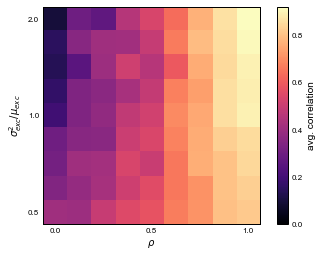

In [268]:
drawHeatmapCorrelationMat(correlation_matrix_2, rho_arr, var_arr)

### Default parameters with 5 max synapses and I/E ratio = 2

In [265]:
correlation_matrix_3, W_e_var, W_e_mean_true, true_corr_array = returnCorrelationMatrixFromSynapticInput(max_syn=5)

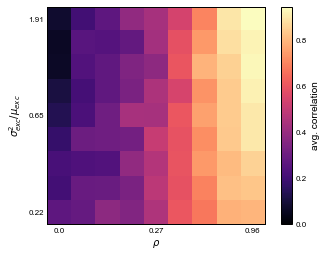

In [266]:
drawHeatmapCorrelationMat(correlation_matrix_3, true_corr_array, W_e_var/W_e_mean_true)

In [179]:
W_e_mean_true, W_e_var, np.max(correlation_matrix_3),W_e_var/ W_e_mean_true

(array([0.76774867, 0.78958475, 0.82225394, 0.85956674, 0.89368043,
        0.93657986, 0.98945617, 1.05543408, 1.10157383]),
 array([0.1684634 , 0.23141039, 0.33216216, 0.45339766, 0.59651504,
        0.81311912, 1.17737758, 1.55245225, 2.03794424]),
 0.7729253581973782,
 array([0.21942519, 0.2930786 , 0.40396542, 0.52747232, 0.66748137,
        0.86817917, 1.18992394, 1.47091351, 1.85002966]))

In [185]:
correlation_matrix_5, W_e_var, W_e_mean_true, true_corr_array = returnCorrelationMatrixFromSynapticInput(max_syn=5, p_I=0.2)

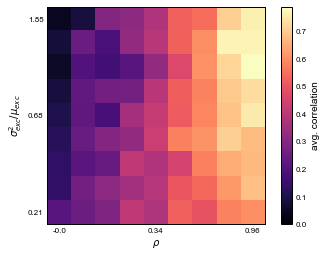

In [186]:
drawHeatmapCorrelationMat(correlation_matrix_5, true_corr_array, W_e_var/W_e_mean_true)

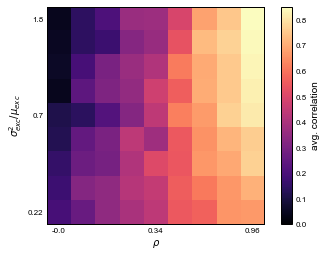

In [184]:
correlation_matrix_6, W_e_var, W_e_mean_true, true_corr_array = returnCorrelationMatrixFromSynapticInput(max_syn=5, p_I=0.5)
drawHeatmapCorrelationMat(correlation_matrix_6, true_corr_array, W_e_var/W_e_mean_true)

## Rsquare for E and I

In [ ]:
correlation_matrix_7, W_e_var, W_e_mean_true, true_corr_array = returnCorrelationMatrixFromSynapticInput(max_syn=5, p_I=0.8, corrType='rsquare')

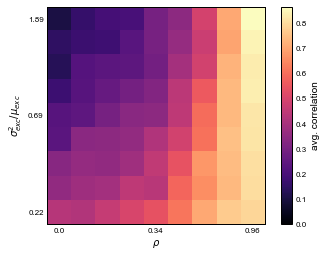

In [220]:
drawHeatmapCorrelationMat(correlation_matrix_7, true_corr_array, W_e_var/W_e_mean_true)

In [ ]:
correlation_matrix_8, W_e_var, W_e_mean_true, true_corr_array = returnCorrelationMatrixFromSynapticInput(max_syn=20, p_I=0.8, corrType='rsquare')

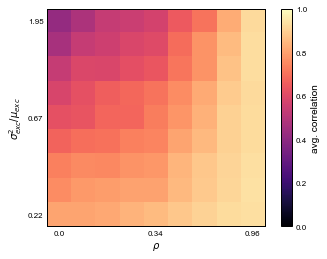

In [204]:
drawHeatmapCorrelationMat(correlation_matrix_8, true_corr_array, W_e_var/W_e_mean_true)

In [263]:
correlation_matrix_9, W_e_var, W_e_mean_true, true_corr_array = returnCorrelationMatrixFromSynapticInput(max_syn=30, p_I=0.8, corrType='rsquare')

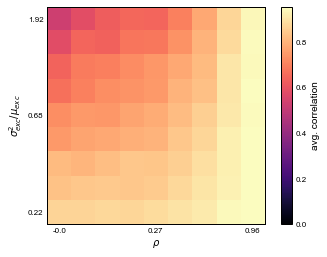

In [264]:
drawHeatmapCorrelationMat(correlation_matrix_9, true_corr_array, W_e_var/W_e_mean_true)

## Testing with a given mean and variance

In [76]:
correlation_matrix_4, W_exc, W_inh = returnCorrelationMatrixFromSynapticInput(max_syn=20)

3.093638382555255 2.6947417909073152
3.093638382555255 2.6947417909073152
3.093638382555255 2.6947417909073152
3.093638382555255 2.6947417909073152
3.093638382555255 2.6947417909073152
3.093638382555255 2.6947417909073152
3.093638382555255 2.6947417909073152
3.093638382555255 2.6947417909073152
3.093638382555255 2.6947417909073152
3.3011778532776517 4.234199235864174
3.3011778532776517 4.234199235864174
3.3011778532776517 4.234199235864174
3.3011778532776517 4.234199235864174
3.3011778532776517 4.234199235864174
3.3011778532776517 4.234199235864174
3.3011778532776517 4.234199235864174
3.3011778532776517 4.234199235864174
3.3011778532776517 4.234199235864174
3.4545641371345464 9.409616622345347
3.4545641371345464 9.409616622345347
3.4545641371345464 9.409616622345347
3.4545641371345464 9.409616622345347
3.4545641371345464 9.409616622345347
3.4545641371345464 9.409616622345347
3.4545641371345464 9.409616622345347
3.4545641371345464 9.409616622345347
3.4545641371345464 9.409616622345347
3

10.7638390863742 976.4548901993788
10.7638390863742 976.4548901993788
10.7638390863742 976.4548901993788
10.7638390863742 976.4548901993788
10.7638390863742 976.4548901993788
10.7638390863742 976.4548901993788
20.663868729502457 4166.4555398627635
20.663868729502457 4166.4555398627635
20.663868729502457 4166.4555398627635
20.663868729502457 4166.4555398627635
20.663868729502457 4166.4555398627635
20.663868729502457 4166.4555398627635
20.663868729502457 4166.4555398627635
20.663868729502457 4166.4555398627635
20.663868729502457 4166.4555398627635
2.96861415215603 2.3650894889184664
2.96861415215603 2.3650894889184664
2.96861415215603 2.3650894889184664
2.96861415215603 2.3650894889184664
2.96861415215603 2.3650894889184664
2.96861415215603 2.3650894889184664
2.96861415215603 2.3650894889184664
2.96861415215603 2.3650894889184664
2.96861415215603 2.3650894889184664
3.2899400902737552 4.734792449306353
3.2899400902737552 4.734792449306353
3.2899400902737552 4.734792449306353
3.28994009027

5.865383221771775 128.85126788175853
5.865383221771775 128.85126788175853
5.865383221771775 128.85126788175853
5.865383221771775 128.85126788175853
5.865383221771775 128.85126788175853
5.865383221771775 128.85126788175853
5.865383221771775 128.85126788175853
5.865383221771775 128.85126788175853
7.635264781577484 309.92017525512426
7.635264781577484 309.92017525512426
7.635264781577484 309.92017525512426
7.635264781577484 309.92017525512426
7.635264781577484 309.92017525512426
7.635264781577484 309.92017525512426
7.635264781577484 309.92017525512426
7.635264781577484 309.92017525512426
7.635264781577484 309.92017525512426
10.723116525158886 845.4481251246555
10.723116525158886 845.4481251246555
10.723116525158886 845.4481251246555
10.723116525158886 845.4481251246555
10.723116525158886 845.4481251246555
10.723116525158886 845.4481251246555
10.723116525158886 845.4481251246555
10.723116525158886 845.4481251246555
10.723116525158886 845.4481251246555
17.831000931507063 7521.192079344408
1

3.9507944562033064 15.763236014782033
3.9507944562033064 15.763236014782033
3.9507944562033064 15.763236014782033
3.9507944562033064 15.763236014782033
3.9507944562033064 15.763236014782033
3.9507944562033064 15.763236014782033
3.9507944562033064 15.763236014782033
4.166742731605134 28.23922191223804
4.166742731605134 28.23922191223804
4.166742731605134 28.23922191223804
4.166742731605134 28.23922191223804
4.166742731605134 28.23922191223804
4.166742731605134 28.23922191223804
4.166742731605134 28.23922191223804
4.166742731605134 28.23922191223804
4.166742731605134 28.23922191223804
5.166559388221198 61.99748001164
5.166559388221198 61.99748001164
5.166559388221198 61.99748001164
5.166559388221198 61.99748001164
5.166559388221198 61.99748001164
5.166559388221198 61.99748001164
5.166559388221198 61.99748001164
5.166559388221198 61.99748001164
5.166559388221198 61.99748001164
7.727845002060902 387.7278921328088
7.727845002060902 387.7278921328088
7.727845002060902 387.7278921328088
7.727

3.2553549914137783 5.214292065552816
3.428577459036502 6.894813412752915
3.428577459036502 6.894813412752915
3.428577459036502 6.894813412752915
3.428577459036502 6.894813412752915
3.428577459036502 6.894813412752915
3.428577459036502 6.894813412752915
3.428577459036502 6.894813412752915
3.428577459036502 6.894813412752915
3.428577459036502 6.894813412752915
3.7894073443785983 15.975279948918116
3.7894073443785983 15.975279948918116
3.7894073443785983 15.975279948918116
3.7894073443785983 15.975279948918116
3.7894073443785983 15.975279948918116
3.7894073443785983 15.975279948918116
3.7894073443785983 15.975279948918116
3.7894073443785983 15.975279948918116
3.7894073443785983 15.975279948918116
4.29916070475088 29.612852447282204
4.29916070475088 29.612852447282204
4.29916070475088 29.612852447282204
4.29916070475088 29.612852447282204
4.29916070475088 29.612852447282204
4.29916070475088 29.612852447282204
4.29916070475088 29.612852447282204
4.29916070475088 29.612852447282204
4.2991607

25.90864008289509 10145.161289187941
3.092080595107434 2.9562972535989167
3.092080595107434 2.9562972535989167
3.092080595107434 2.9562972535989167
3.092080595107434 2.9562972535989167
3.092080595107434 2.9562972535989167
3.092080595107434 2.9562972535989167
3.092080595107434 2.9562972535989167
3.092080595107434 2.9562972535989167
3.092080595107434 2.9562972535989167
3.0875190187069554 3.276026138374458
3.0875190187069554 3.276026138374458
3.0875190187069554 3.276026138374458
3.0875190187069554 3.276026138374458
3.0875190187069554 3.276026138374458
3.0875190187069554 3.276026138374458
3.0875190187069554 3.276026138374458
3.0875190187069554 3.276026138374458
3.0875190187069554 3.276026138374458
3.4731349294300027 7.988909892460621
3.4731349294300027 7.988909892460621
3.4731349294300027 7.988909892460621
3.4731349294300027 7.988909892460621
3.4731349294300027 7.988909892460621
3.4731349294300027 7.988909892460621
3.4731349294300027 7.988909892460621
3.4731349294300027 7.988909892460621
3

KeyboardInterrupt: 

In [ ]:
correlation_matrix_1 = returnCorrelationMatrixFromSynapticInput()

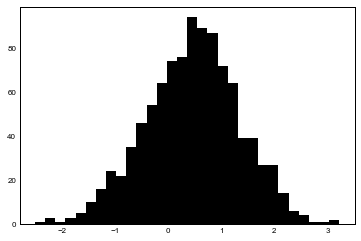

(0.0031185837804115074, 18.999037716322338, 6379.355091246045)

In [70]:
plt.hist(np.log10(w_e),bins=30)
# plt.xlim(xmin=0.)
plt.show()
min(w_e), np.mean(w_e), np.var(w_e)

In [65]:
np.mean(w_e), np.var(w_e), np.mean(w_i), np.corrcoef(w_e, w_i)[0,1], np.corrcoef(W_exc, W_inh)[0,1]

(3.7624358810732255,
 77.5458363899223,
 3.762435881073226,
 0.9954869169016705,
 0.843542156878357)

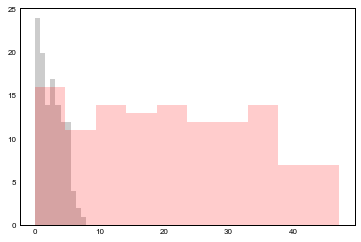

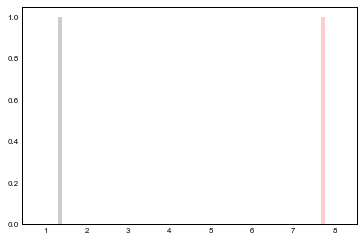

In [64]:
fig, ax = plt.subplots()
ax.hist(W_exc, alpha=0.2)
ax.hist(W_inh,color='r', alpha=0.2)
plt.show()

fig, ax = plt.subplots()
ax.hist(np.var(W_exc)/np.mean(W_exc), alpha=0.2)
ax.hist(np.var(W_inh)/np.mean(W_inh),color='r', alpha=0.2)
plt.show()


In [14]:
w_e = np.array([1,2,3,4,3.1])
sorted_indices = np.argsort(w_e)
minDiff = np.min(np.diff(w_e[sorted_indices]))
bins = np.arange(w_e[sorted_indices[0]], w_e[sorted_indices[-1]]+minDiff, minDiff)
result = np.digitize(w_e, bins, right=True)

rho=0.1
L = len(bins)

shuffle_length = int((L - 1) * (1-rho) + 1)

shuffled_bins = []

for binIndex in range(0,L,shuffle_length):
    shuffled_bins.append(np.random.permutation(bins [binIndex : binIndex+ shuffle_length]))
shuffled_bins = np.concatenate(shuffled_bins)

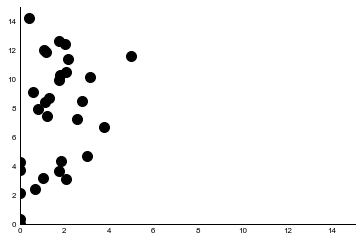

In [15]:
fig, ax = plt.subplots()
ax.scatter(W_exc, W_inh)
ax.set_xlim(xmin=0)
ax.set_ylim(ymin=0)
ax.set_xlim(ax.get_ylim())
simpleaxis(ax)
plt.show()

In [16]:
np.mean(W_exc), np.mean(W_inh)

(1.5689806422631287, 7.452976746655139)

In [17]:
np.std(W_exc), np.std(W_inh)

(1.1834206007486845, 3.926896984363892)

In [18]:
W_exc, W_inh

([0.0,
  0.0,
  0.0,
  0.686443914275847,
  2.0778216359276613,
  1.0329311698536217,
  1.7713272781237068,
  0.0,
  0.0,
  1.8494375176293418,
  3.030526159338625,
  3.7789615998316686,
  2.559504953826808,
  1.2277022140282718,
  0.8243336838026467,
  1.117289909636655,
  2.8005167353919034,
  1.32842367690253,
  0.5952170008546972,
  1.7488346002643498,
  3.1472505648855127,
  1.8151209392822638,
  2.055353827813699,
  2.156487863226886,
  5.00455028054969,
  1.1975979451828238,
  1.0690401764960504,
  2.010219743078134,
  1.746652875856863,
  0.43787300183361216],
 [0.0,
  0.37994955647189266,
  2.1512768345955995,
  2.4577711923995538,
  3.130939599925198,
  3.165099441495625,
  3.6676607334400626,
  3.7209291379640854,
  4.2727997700829325,
  4.350910009588567,
  4.699670921161498,
  6.7073052428694595,
  7.294275777221255,
  7.50626728667263,
  7.95038878878364,
  8.425961561013356,
  8.531731581026753,
  8.718145937070426,
  9.11403446441028,
  9.962237520982852,
  10.168010415

## Within/Across cells I/E ratio for different stimuli

In [14]:
i_e_ratio = []
i_e_mean = []

for index, n in enumerate(neurons):
    i_e_ratio.append([])
    e_cell_all_points = []
    i_cell_all_points = []
    numSqrWise_e = {}
    numSqrWise_i = {}
    
    exc = {}
    inh = {}
    for expType,expt in n:
        for sqr in expt:
                if (expType == 1):
                    for coord in expt[sqr].coordwise:
                        exc[coord] = -expt[sqr].coordwise[coord].average_feature[5]*scalingFactor
                            
                elif (expType == 2):
                    for coord in expt[sqr].coordwise:
                        inh[coord] = expt[sqr].coordwise[coord].average_feature[0]*scalingFactor
    
    i_e_ratio[index] = np.array([inh[coord]/exc[coord] for coord in set(exc.keys()).intersection(set(inh.keys()))])
    i_e_mean.append(np.mean([inh[coord]/exc[coord] for coord in set(exc.keys()).intersection(set(inh.keys()))]))

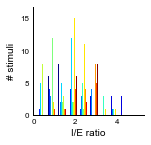

In [15]:
fig, ax = plt.subplots()
ax.hist(i_e_ratio, bins=10, stacked=False, histtype='bar', color=color_cell)
ax.set_xlabel("I/E ratio")
ax.set_ylabel("# stimuli")
simpleaxis(ax)
fig.set_figwidth(2)
fig.set_figheight(2)
plt.show()

[0.41240968440592146, 0.7183535757343573, 0.7184479236370818, 1.0213045931480957, 0.6865747016778012, 0.489646452694707, 0.5216386257549684, 0.6904641262213832, 0.6004705446313072, 0.5978649303299943, 0.5052854482555271, 0.28434907639563206, 0.3017297534932703] 0.9112713821491757


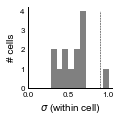

In [22]:
within_cell_std = [np.std(k,ddof=1) for k in i_e_ratio]
across_cell_std = np.std(np.concatenate(i_e_ratio),ddof=1)

print(within_cell_std, across_cell_std)

fig, ax = plt.subplots()
ax.hist(within_cell_std, bins = 10, histtype='bar', color='gray')
ax.vlines(x=across_cell_std,ymin=0., ymax=4., linestyles='--')
ax.set_xlabel("$\sigma$ (within cell)")
ax.set_ylabel("# cells")
ax.set_xlim(xmin=0.)
simpleaxis(ax)
fig.set_figwidth(1.5)
fig.set_figheight(1.5)
plt.savefig('figures/supplementary/cell_std.svg', transparent=True, bbox_inches='tight')
dump(fig,file('figures/supplementary/cell_std.pkl','wb'))
plt.show()

In [257]:
i_e_ratio

[array([1.06666282, 1.43563554, 1.2579235 , 1.42794599, 1.72921838,
        1.51630091, 0.7214427 , 1.40688714, 0.58345169, 1.71834948,
        1.58616175, 1.66545112, 1.84414228, 2.10257152, 1.81952743,
        0.93153012, 0.83561101, 1.72983412, 1.56238386, 1.80588676,
        0.73825583, 1.01919863, 1.66768091, 1.73554785, 1.57420097]),
 array([4.2461734 , 2.27986313, 3.24294312, 4.4552571 , 3.57592906,
        3.62539852, 3.32636109, 3.5964895 , 2.97822287, 3.68234891,
        2.78806543, 5.1325542 , 2.89909647, 4.1414595 , 3.48139229,
        4.70296969, 3.56628491, 2.43066615, 3.50547417, 3.69015945,
        2.37929032, 3.70909368, 3.16266916, 3.54169631, 2.48337051]),
 array([1.70943384, 1.10366782, 2.04373083, 2.67364468, 0.73917623,
        1.11560912, 0.48262214, 1.18221194, 0.76193356, 1.7487231 ,
        1.19103972, 2.93222556, 2.19551748, 1.96717002, 1.25773309]),
 array([3.73753403, 1.57995615, 3.41508675, 0.81231194, 3.06506703,
        4.25887053, 2.70916028, 3.23185046

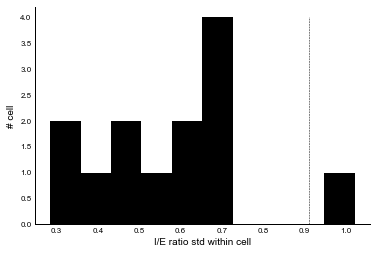

[0.41240968440592146, 0.7183535757343573, 0.7184479236370818, 1.0213045931480957, 0.6865747016778012, 0.489646452694707, 0.5216386257549684, 0.6904641262213832, 0.6004705446313072, 0.5978649303299943, 0.5052854482555271, 0.28434907639563206, 0.3017297534932703] 0.9112713821491757


In [260]:
cell_std = []
for cell in i_e_ratio:
    cell_std.append(np.std(cell,ddof=1))

all_i_e_ratio_std = np.std(np.concatenate(i_e_ratio), ddof=1)

fig, ax = plt.subplots()
ax.hist(cell_std)
ax.vlines(x=all_i_e_ratio_std, ymin=0, ymax=4, linestyles='--')
ax.set_xlabel("I/E ratio std within cell")
ax.set_ylabel("# cell")
simpleaxis(ax)
plt.show()
print (cell_std, all_i_e_ratio_std)

### Calculating fano's factor for all cells.

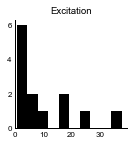

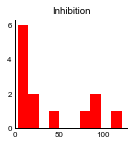

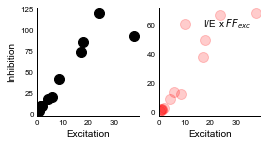

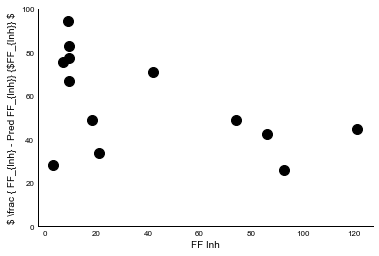

In [261]:
fig, ax = plt.subplots()
ax.hist(e_fano_fac)
ax.set_xlim(xmin=0.)
simpleaxis(ax)
ax.set_title("Excitation")
fig.set_figwidth(2)
fig.set_figheight(2)
plt.show()

fig, ax = plt.subplots()
ax.hist(i_fano_fac, color='r')
ax.set_xlim(xmin=0.)
simpleaxis(ax)
ax.set_title("Inhibition")
fig.set_figwidth(2)
fig.set_figheight(2)
plt.show()

fig, (ax1,ax2) = plt.subplots(ncols=2)
ax1.scatter(e_fano_fac, i_fano_fac)
ax2.scatter(e_fano_fac, [i*j for (i,j) in zip(i_e_mean,e_fano_fac)],c='r',alpha=0.2, label="I/E x $FF_{exc}$")
ax1.set_xlim(xmin=0.)
ax2.set_xlim(xmin=0.)
simpleaxis([ax1,ax2])
ax1.set_xlabel("Excitation")
ax1.set_ylabel("Inhibition")
ax2.set_xlabel("Excitation")
fig.set_figwidth(4)
fig.set_figheight(2)
plt.legend()
plt.show()

fig, ax = plt.subplots()
ax.scatter(i_fano_fac, (i_fano_fac - np.array(i_e_mean)*np.array(e_fano_fac))*100/i_fano_fac)
ax.set_ylabel("$ \\frac { FF_{Inh} - Pred FF_{Inh}} {$FF_{Inh}} $")
ax.set_xlabel("FF Inh")
ax.set_ylim(0,100)
simpleaxis(ax)
plt.show()

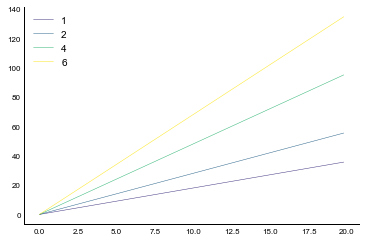

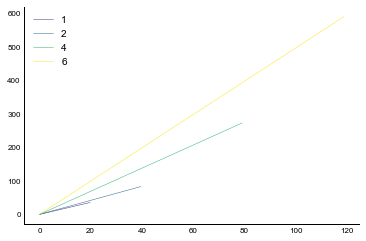

In [157]:
n = np.array(range(100))
p = 0.2
w_bar = [1,2,4,6]
w_tilde = [1,2,4,6]

fig, ax = plt.subplots()
w_b = w_bar[0]
for w_t in w_tilde:
    ax.plot(n*p*w_b, n*p*((1-p)*(w_b**2) + w_t), label="{}".format(w_t), color=matplotlib.cm.viridis(w_t/float(max(w_tilde))))
plt.legend()
simpleaxis(ax)
plt.show()

w_t = w_tilde[0]
fig, ax = plt.subplots()
for w_b in w_bar:
    ax.plot(n*p*w_b, n*p*((1-p)*(w_b**2) + w_t), label="{}".format(w_b), color=matplotlib.cm.viridis(w_b/float(max(w_bar))))
plt.legend()
simpleaxis(ax)
plt.show()